# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [38]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""

import helper
 
helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


In [0]:


#!pip install --upgrade --force-reinstall matplotlib==2.0.0
!pip install --upgrade --force-reinstall tqdm==4.11.2
#!pip install --upgrade numpy
from google.colab import files
files.upload()
import helper
import problem_unittests
# choose the file on your computer to upload it then


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

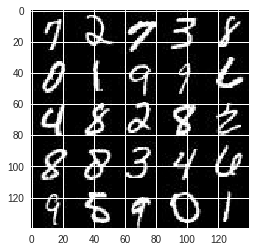

In [39]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot
import numpy as np

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(np.array(helper.images_square_grid(mnist_images, 'L')), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

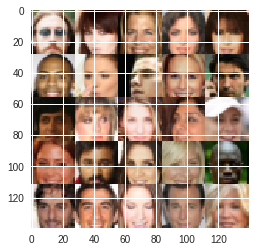

In [40]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [41]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.8.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [42]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real=tf.placeholder(tf.float32,[None,image_width,image_height,image_channels],name="input_real")
    inputs_z=tf.placeholder(tf.float32,[None,z_dim],name="input_z")
    learning_rate=tf.placeholder(tf.float32,[],name="learning_rate")

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [44]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=0.2
    with tf.variable_scope("discriminator",reuse=reuse):
        x1=tf.layers.conv2d(images,64,5, strides=2,padding="same")
        x1=tf.maximum(x1*alpha,x1)
        #layer2
        x2=tf.layers.conv2d(x1,128,5 ,strides=2,padding="same")
        x2=tf.layers.batch_normalization(x2, training=True)
        x2=tf.maximum(x2*alpha,x2)

        #layer3
        x3=tf.layers.conv2d(x2,256,5 ,strides=2,padding="same")
        x3=tf.layers.batch_normalization(x3, training=True)
        x3=tf.maximum(x3*alpha,x3)

        # Flatten it
        flat = tf.reshape(x3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)



    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [45]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha=0.2
    with tf.variable_scope('generator', reuse=not (is_train)):
        
        x1=tf.layers.dense(z,7*7*512)
        x1=tf.reshape(x1,[-1,7,7,512])
        x1= tf.layers.batch_normalization(x1, training=True)
        x1 = tf.maximum(alpha * x1, x1)
        #conv1
        x2=tf.layers.conv2d_transpose(x1,265,5,strides=2,padding='same')
        x2= tf.layers.batch_normalization(x2, training=True)
        x2= tf.maximum(alpha * x2, x2)
        

        #output layer
        logits=tf.layers.conv2d_transpose(x2,out_channel_dim,5,strides=2,padding='same')
        
        out=tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [46]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    g_model=generator(input_z, out_channel_dim, is_train=True)
    d_real_out,d_real_logits=discriminator(input_real, reuse=False)
    d_fake_out,d_fake_logits=discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_real_logits, labels=tf.ones_like(d_real_out )* (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits, labels=tf.zeros_like(d_fake_out)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits, labels=tf.ones_like(d_fake_out)))

    d_loss = d_loss_real + d_loss_fake
    
    
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [47]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [0]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(np.array(images_grid), cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [0]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #saver = tf.train.Saver()
    input_real,input_z,lr=model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss,g_loss=model_loss(input_real, input_z, data_shape[3])
    d_train_opt,g_train_opt=model_opt(d_loss, g_loss, learning_rate, beta1)
    steps=0
    losses =[]
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                batch_images*=2
                steps+=1
                # TODO: Train Model
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))   
    
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z,lr: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z,input_real: batch_images,lr: learning_rate})
                
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
# Save training generator samples
#with open('train_samples.pkl', 'wb') as f:
    #pkl.dump(samples, f)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.5297... Generator Loss: 0.1445
Epoch 1/2... Discriminator Loss: 1.7211... Generator Loss: 0.6421
Epoch 1/2... Discriminator Loss: 1.1826... Generator Loss: 0.8813
Epoch 1/2... Discriminator Loss: 1.5762... Generator Loss: 0.6127
Epoch 1/2... Discriminator Loss: 1.4645... Generator Loss: 0.5393
Epoch 1/2... Discriminator Loss: 0.9870... Generator Loss: 1.3031
Epoch 1/2... Discriminator Loss: 1.7783... Generator Loss: 0.6254
Epoch 1/2... Discriminator Loss: 1.8441... Generator Loss: 0.2633
Epoch 1/2... Discriminator Loss: 1.9619... Generator Loss: 0.2424
Epoch 1/2... Discriminator Loss: 2.0716... Generator Loss: 0.2466


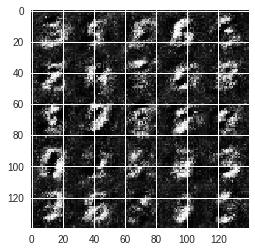

Epoch 1/2... Discriminator Loss: 1.6794... Generator Loss: 0.3490
Epoch 1/2... Discriminator Loss: 1.6323... Generator Loss: 0.3865
Epoch 1/2... Discriminator Loss: 1.4021... Generator Loss: 1.3196
Epoch 1/2... Discriminator Loss: 1.5356... Generator Loss: 0.3951
Epoch 1/2... Discriminator Loss: 1.6041... Generator Loss: 0.3583
Epoch 1/2... Discriminator Loss: 1.9376... Generator Loss: 0.2592
Epoch 1/2... Discriminator Loss: 1.1137... Generator Loss: 1.6577
Epoch 1/2... Discriminator Loss: 1.3109... Generator Loss: 0.5958
Epoch 1/2... Discriminator Loss: 0.9933... Generator Loss: 1.2298
Epoch 1/2... Discriminator Loss: 1.3951... Generator Loss: 0.4503


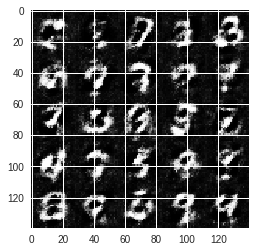

Epoch 1/2... Discriminator Loss: 1.0707... Generator Loss: 1.1209
Epoch 1/2... Discriminator Loss: 1.5024... Generator Loss: 0.4229
Epoch 1/2... Discriminator Loss: 1.3699... Generator Loss: 1.4598
Epoch 1/2... Discriminator Loss: 1.2573... Generator Loss: 0.6229
Epoch 1/2... Discriminator Loss: 1.1518... Generator Loss: 1.4662
Epoch 1/2... Discriminator Loss: 1.5393... Generator Loss: 0.3901
Epoch 1/2... Discriminator Loss: 1.6525... Generator Loss: 0.3440
Epoch 1/2... Discriminator Loss: 1.2313... Generator Loss: 0.6971
Epoch 1/2... Discriminator Loss: 1.1639... Generator Loss: 0.6915
Epoch 1/2... Discriminator Loss: 1.2980... Generator Loss: 0.5820


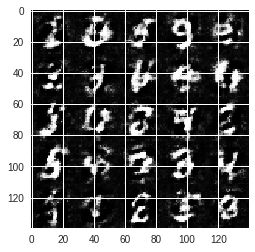

Epoch 1/2... Discriminator Loss: 1.1943... Generator Loss: 0.6903
Epoch 1/2... Discriminator Loss: 1.2623... Generator Loss: 2.0926
Epoch 1/2... Discriminator Loss: 1.0737... Generator Loss: 1.4134
Epoch 1/2... Discriminator Loss: 1.3445... Generator Loss: 1.4289
Epoch 1/2... Discriminator Loss: 1.2198... Generator Loss: 0.6169
Epoch 1/2... Discriminator Loss: 1.3954... Generator Loss: 0.4829
Epoch 1/2... Discriminator Loss: 1.1266... Generator Loss: 1.0108
Epoch 1/2... Discriminator Loss: 0.9402... Generator Loss: 0.9387
Epoch 1/2... Discriminator Loss: 1.0995... Generator Loss: 0.8047
Epoch 1/2... Discriminator Loss: 1.0524... Generator Loss: 0.9961


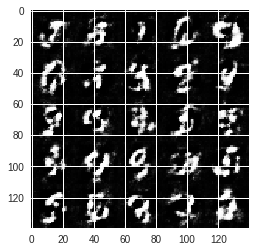

Epoch 1/2... Discriminator Loss: 0.9060... Generator Loss: 1.1202
Epoch 1/2... Discriminator Loss: 1.1108... Generator Loss: 2.0174
Epoch 1/2... Discriminator Loss: 0.9854... Generator Loss: 1.1029
Epoch 1/2... Discriminator Loss: 1.1794... Generator Loss: 1.0807
Epoch 1/2... Discriminator Loss: 1.0408... Generator Loss: 0.8235
Epoch 1/2... Discriminator Loss: 1.0105... Generator Loss: 0.8808
Epoch 1/2... Discriminator Loss: 1.2592... Generator Loss: 2.4925
Epoch 1/2... Discriminator Loss: 0.7687... Generator Loss: 1.5237
Epoch 1/2... Discriminator Loss: 1.1408... Generator Loss: 0.6687
Epoch 1/2... Discriminator Loss: 1.1513... Generator Loss: 2.1329


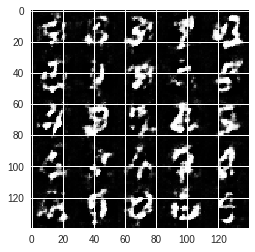

Epoch 1/2... Discriminator Loss: 0.9501... Generator Loss: 1.0977
Epoch 1/2... Discriminator Loss: 0.9268... Generator Loss: 1.1370
Epoch 1/2... Discriminator Loss: 0.9033... Generator Loss: 0.9169
Epoch 1/2... Discriminator Loss: 1.2008... Generator Loss: 0.6068
Epoch 1/2... Discriminator Loss: 0.9249... Generator Loss: 1.6909
Epoch 1/2... Discriminator Loss: 0.8565... Generator Loss: 1.2181
Epoch 1/2... Discriminator Loss: 1.3398... Generator Loss: 0.5617
Epoch 1/2... Discriminator Loss: 0.8549... Generator Loss: 1.0705
Epoch 1/2... Discriminator Loss: 0.7441... Generator Loss: 1.4714
Epoch 1/2... Discriminator Loss: 0.9719... Generator Loss: 0.8947


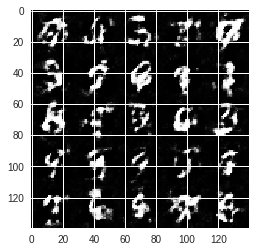

Epoch 1/2... Discriminator Loss: 0.9642... Generator Loss: 0.9166
Epoch 1/2... Discriminator Loss: 1.2888... Generator Loss: 0.5530
Epoch 1/2... Discriminator Loss: 0.9616... Generator Loss: 1.0822
Epoch 1/2... Discriminator Loss: 0.7958... Generator Loss: 1.1980
Epoch 1/2... Discriminator Loss: 1.1243... Generator Loss: 0.7226
Epoch 1/2... Discriminator Loss: 0.7918... Generator Loss: 1.2833
Epoch 1/2... Discriminator Loss: 0.9168... Generator Loss: 0.9081
Epoch 1/2... Discriminator Loss: 0.7894... Generator Loss: 2.2102
Epoch 1/2... Discriminator Loss: 0.8115... Generator Loss: 1.2590
Epoch 1/2... Discriminator Loss: 0.6856... Generator Loss: 1.7673


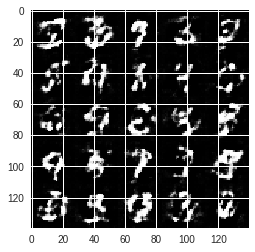

Epoch 1/2... Discriminator Loss: 0.7695... Generator Loss: 1.3521
Epoch 1/2... Discriminator Loss: 0.7890... Generator Loss: 1.1404
Epoch 1/2... Discriminator Loss: 0.8848... Generator Loss: 1.1211
Epoch 1/2... Discriminator Loss: 0.8485... Generator Loss: 1.7332
Epoch 1/2... Discriminator Loss: 1.1658... Generator Loss: 0.6719
Epoch 1/2... Discriminator Loss: 1.1462... Generator Loss: 0.6928
Epoch 1/2... Discriminator Loss: 0.8849... Generator Loss: 0.9566
Epoch 1/2... Discriminator Loss: 0.7075... Generator Loss: 1.4936
Epoch 1/2... Discriminator Loss: 1.5201... Generator Loss: 0.4828
Epoch 1/2... Discriminator Loss: 0.8531... Generator Loss: 1.1337


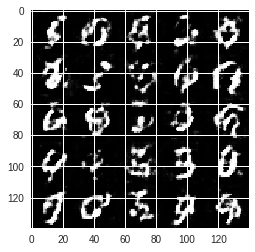

Epoch 1/2... Discriminator Loss: 1.0627... Generator Loss: 1.2422
Epoch 1/2... Discriminator Loss: 0.7061... Generator Loss: 1.7659
Epoch 1/2... Discriminator Loss: 0.9103... Generator Loss: 1.0249
Epoch 1/2... Discriminator Loss: 1.5865... Generator Loss: 0.4158
Epoch 1/2... Discriminator Loss: 0.8453... Generator Loss: 1.1294
Epoch 1/2... Discriminator Loss: 0.8380... Generator Loss: 1.2135
Epoch 1/2... Discriminator Loss: 0.8775... Generator Loss: 2.0141
Epoch 1/2... Discriminator Loss: 0.7815... Generator Loss: 1.3756
Epoch 1/2... Discriminator Loss: 1.2917... Generator Loss: 0.5938
Epoch 1/2... Discriminator Loss: 1.0473... Generator Loss: 2.6667


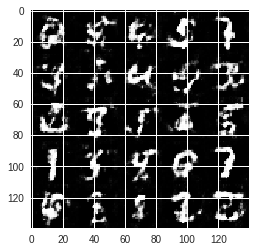

Epoch 1/2... Discriminator Loss: 0.8179... Generator Loss: 1.2699
Epoch 1/2... Discriminator Loss: 1.8025... Generator Loss: 0.3962
Epoch 1/2... Discriminator Loss: 1.0756... Generator Loss: 0.7935
Epoch 1/2... Discriminator Loss: 0.8727... Generator Loss: 1.5027
Epoch 1/2... Discriminator Loss: 0.6844... Generator Loss: 1.3695
Epoch 1/2... Discriminator Loss: 1.1201... Generator Loss: 0.7868
Epoch 1/2... Discriminator Loss: 0.6684... Generator Loss: 1.7356
Epoch 1/2... Discriminator Loss: 1.2213... Generator Loss: 0.6081
Epoch 1/2... Discriminator Loss: 0.6984... Generator Loss: 1.4289
Epoch 1/2... Discriminator Loss: 0.8585... Generator Loss: 1.1378


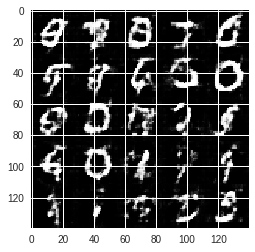

Epoch 1/2... Discriminator Loss: 1.5854... Generator Loss: 0.3688
Epoch 1/2... Discriminator Loss: 1.2397... Generator Loss: 0.7166
Epoch 1/2... Discriminator Loss: 1.5938... Generator Loss: 0.4003
Epoch 1/2... Discriminator Loss: 0.8405... Generator Loss: 1.1525
Epoch 1/2... Discriminator Loss: 0.8295... Generator Loss: 1.4296
Epoch 1/2... Discriminator Loss: 0.7079... Generator Loss: 2.2485
Epoch 1/2... Discriminator Loss: 1.1089... Generator Loss: 1.3165
Epoch 1/2... Discriminator Loss: 1.0236... Generator Loss: 0.8107
Epoch 1/2... Discriminator Loss: 0.7949... Generator Loss: 1.9170
Epoch 1/2... Discriminator Loss: 1.0744... Generator Loss: 0.7411


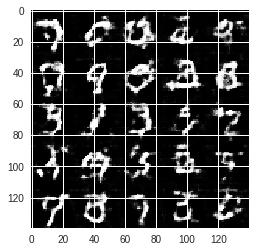

Epoch 1/2... Discriminator Loss: 0.7227... Generator Loss: 1.3044
Epoch 1/2... Discriminator Loss: 0.8251... Generator Loss: 1.0982
Epoch 1/2... Discriminator Loss: 0.7769... Generator Loss: 1.9703
Epoch 1/2... Discriminator Loss: 0.7848... Generator Loss: 1.5260
Epoch 1/2... Discriminator Loss: 1.1947... Generator Loss: 1.1826
Epoch 1/2... Discriminator Loss: 0.9574... Generator Loss: 1.0887
Epoch 1/2... Discriminator Loss: 1.7573... Generator Loss: 0.3800
Epoch 1/2... Discriminator Loss: 0.8948... Generator Loss: 1.1124
Epoch 1/2... Discriminator Loss: 0.9756... Generator Loss: 0.9507
Epoch 1/2... Discriminator Loss: 1.0315... Generator Loss: 0.8731


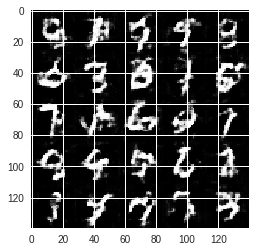

Epoch 1/2... Discriminator Loss: 0.9263... Generator Loss: 0.9262
Epoch 1/2... Discriminator Loss: 1.0253... Generator Loss: 0.8924
Epoch 1/2... Discriminator Loss: 1.1875... Generator Loss: 0.6990
Epoch 1/2... Discriminator Loss: 0.8203... Generator Loss: 1.4327
Epoch 1/2... Discriminator Loss: 0.8046... Generator Loss: 2.3403
Epoch 1/2... Discriminator Loss: 1.5003... Generator Loss: 0.4423
Epoch 1/2... Discriminator Loss: 0.9826... Generator Loss: 0.9208
Epoch 1/2... Discriminator Loss: 1.5774... Generator Loss: 0.3954
Epoch 1/2... Discriminator Loss: 0.9701... Generator Loss: 0.8782
Epoch 1/2... Discriminator Loss: 1.1509... Generator Loss: 0.6896


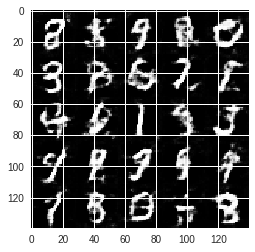

Epoch 1/2... Discriminator Loss: 1.0796... Generator Loss: 0.7088
Epoch 1/2... Discriminator Loss: 0.9034... Generator Loss: 1.3429
Epoch 1/2... Discriminator Loss: 2.0343... Generator Loss: 0.2345
Epoch 1/2... Discriminator Loss: 0.7599... Generator Loss: 1.8268
Epoch 1/2... Discriminator Loss: 1.0033... Generator Loss: 0.8766
Epoch 1/2... Discriminator Loss: 1.5315... Generator Loss: 0.4114
Epoch 1/2... Discriminator Loss: 0.9828... Generator Loss: 0.7707
Epoch 1/2... Discriminator Loss: 1.1195... Generator Loss: 0.7244
Epoch 1/2... Discriminator Loss: 0.8551... Generator Loss: 1.2284
Epoch 1/2... Discriminator Loss: 0.7872... Generator Loss: 1.2008


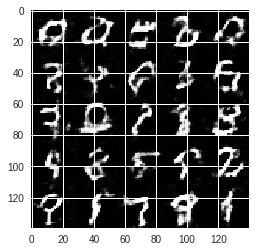

Epoch 1/2... Discriminator Loss: 0.7934... Generator Loss: 1.5210
Epoch 1/2... Discriminator Loss: 0.9486... Generator Loss: 1.2012
Epoch 1/2... Discriminator Loss: 0.8728... Generator Loss: 1.1028
Epoch 1/2... Discriminator Loss: 1.2525... Generator Loss: 0.6192
Epoch 1/2... Discriminator Loss: 1.0245... Generator Loss: 0.9279
Epoch 1/2... Discriminator Loss: 0.9887... Generator Loss: 0.8744
Epoch 1/2... Discriminator Loss: 1.9271... Generator Loss: 0.2734
Epoch 1/2... Discriminator Loss: 1.0566... Generator Loss: 0.7409
Epoch 1/2... Discriminator Loss: 0.6948... Generator Loss: 1.4381
Epoch 1/2... Discriminator Loss: 1.8785... Generator Loss: 0.2996


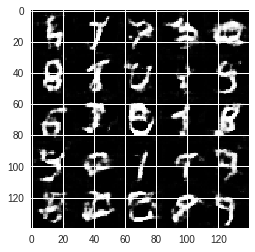

Epoch 1/2... Discriminator Loss: 1.0553... Generator Loss: 0.8277
Epoch 1/2... Discriminator Loss: 1.0147... Generator Loss: 0.8752
Epoch 1/2... Discriminator Loss: 1.0433... Generator Loss: 0.9030
Epoch 1/2... Discriminator Loss: 1.2771... Generator Loss: 0.5645
Epoch 1/2... Discriminator Loss: 1.2536... Generator Loss: 0.5770
Epoch 1/2... Discriminator Loss: 0.9472... Generator Loss: 1.0197
Epoch 1/2... Discriminator Loss: 0.9381... Generator Loss: 0.9760
Epoch 1/2... Discriminator Loss: 0.8172... Generator Loss: 1.2625
Epoch 1/2... Discriminator Loss: 1.3025... Generator Loss: 0.6185
Epoch 1/2... Discriminator Loss: 1.0757... Generator Loss: 0.7830


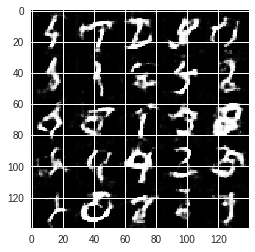

Epoch 1/2... Discriminator Loss: 1.0757... Generator Loss: 0.7573
Epoch 1/2... Discriminator Loss: 0.7398... Generator Loss: 1.5176
Epoch 1/2... Discriminator Loss: 0.8848... Generator Loss: 0.9426
Epoch 1/2... Discriminator Loss: 0.9621... Generator Loss: 0.8339
Epoch 1/2... Discriminator Loss: 0.6789... Generator Loss: 1.4046
Epoch 1/2... Discriminator Loss: 0.7901... Generator Loss: 1.3379
Epoch 1/2... Discriminator Loss: 0.9903... Generator Loss: 0.9288
Epoch 1/2... Discriminator Loss: 0.9157... Generator Loss: 1.0268
Epoch 1/2... Discriminator Loss: 0.8525... Generator Loss: 1.6032
Epoch 1/2... Discriminator Loss: 0.6936... Generator Loss: 1.8595


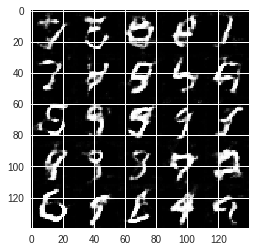

Epoch 1/2... Discriminator Loss: 1.9779... Generator Loss: 0.2440
Epoch 1/2... Discriminator Loss: 0.8812... Generator Loss: 1.5669
Epoch 1/2... Discriminator Loss: 0.6809... Generator Loss: 1.5167
Epoch 1/2... Discriminator Loss: 1.2415... Generator Loss: 0.6322
Epoch 1/2... Discriminator Loss: 1.0809... Generator Loss: 1.2243
Epoch 1/2... Discriminator Loss: 0.8974... Generator Loss: 1.5332
Epoch 1/2... Discriminator Loss: 0.8399... Generator Loss: 2.5248
Epoch 1/2... Discriminator Loss: 1.6585... Generator Loss: 0.3458
Epoch 1/2... Discriminator Loss: 1.4961... Generator Loss: 0.4681
Epoch 1/2... Discriminator Loss: 1.0158... Generator Loss: 0.8842


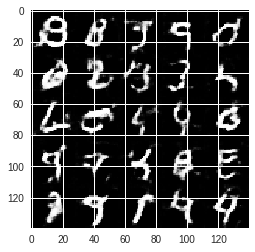

Epoch 1/2... Discriminator Loss: 0.7620... Generator Loss: 2.1752
Epoch 1/2... Discriminator Loss: 0.8898... Generator Loss: 1.0500
Epoch 1/2... Discriminator Loss: 0.8785... Generator Loss: 1.2252
Epoch 1/2... Discriminator Loss: 0.9882... Generator Loss: 0.9018
Epoch 1/2... Discriminator Loss: 0.7746... Generator Loss: 1.2024
Epoch 1/2... Discriminator Loss: 1.9747... Generator Loss: 0.2593
Epoch 1/2... Discriminator Loss: 0.7418... Generator Loss: 1.4101
Epoch 1/2... Discriminator Loss: 1.3329... Generator Loss: 0.5646
Epoch 1/2... Discriminator Loss: 0.9751... Generator Loss: 0.9143
Epoch 1/2... Discriminator Loss: 0.8964... Generator Loss: 1.2324


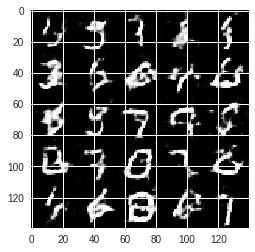

Epoch 1/2... Discriminator Loss: 0.8373... Generator Loss: 1.3495
Epoch 1/2... Discriminator Loss: 1.0738... Generator Loss: 0.9054
Epoch 1/2... Discriminator Loss: 1.0547... Generator Loss: 0.8114
Epoch 1/2... Discriminator Loss: 0.8137... Generator Loss: 1.2035
Epoch 1/2... Discriminator Loss: 0.9391... Generator Loss: 1.3705
Epoch 1/2... Discriminator Loss: 0.8437... Generator Loss: 1.4418
Epoch 1/2... Discriminator Loss: 1.6090... Generator Loss: 0.4186
Epoch 1/2... Discriminator Loss: 0.6595... Generator Loss: 1.5269
Epoch 1/2... Discriminator Loss: 0.9399... Generator Loss: 1.0619
Epoch 1/2... Discriminator Loss: 1.0353... Generator Loss: 0.9566


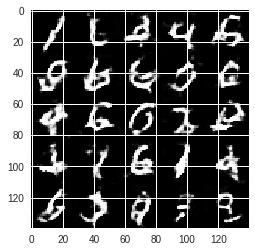

Epoch 1/2... Discriminator Loss: 0.8048... Generator Loss: 1.1649
Epoch 1/2... Discriminator Loss: 1.0424... Generator Loss: 0.8319
Epoch 1/2... Discriminator Loss: 1.1874... Generator Loss: 0.7767
Epoch 1/2... Discriminator Loss: 0.9710... Generator Loss: 1.0447
Epoch 1/2... Discriminator Loss: 0.7712... Generator Loss: 1.1253
Epoch 1/2... Discriminator Loss: 0.9430... Generator Loss: 0.9549
Epoch 1/2... Discriminator Loss: 1.0429... Generator Loss: 0.8467
Epoch 1/2... Discriminator Loss: 1.3043... Generator Loss: 0.5389
Epoch 1/2... Discriminator Loss: 0.7074... Generator Loss: 1.3334
Epoch 1/2... Discriminator Loss: 0.8180... Generator Loss: 2.4905


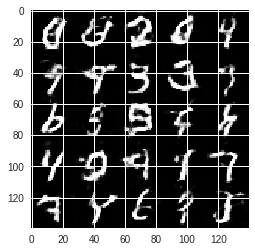

Epoch 1/2... Discriminator Loss: 0.8696... Generator Loss: 1.0372
Epoch 1/2... Discriminator Loss: 0.8954... Generator Loss: 1.1705
Epoch 1/2... Discriminator Loss: 1.2465... Generator Loss: 0.6300
Epoch 1/2... Discriminator Loss: 0.8173... Generator Loss: 1.3539
Epoch 1/2... Discriminator Loss: 0.8789... Generator Loss: 2.1381
Epoch 1/2... Discriminator Loss: 0.9318... Generator Loss: 0.9609
Epoch 1/2... Discriminator Loss: 0.8364... Generator Loss: 1.3931
Epoch 1/2... Discriminator Loss: 0.9104... Generator Loss: 1.0056
Epoch 1/2... Discriminator Loss: 0.8387... Generator Loss: 1.3537
Epoch 1/2... Discriminator Loss: 0.6072... Generator Loss: 1.7733


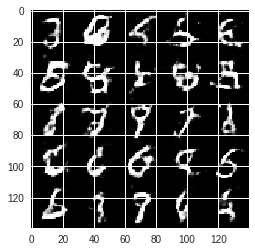

Epoch 1/2... Discriminator Loss: 0.9326... Generator Loss: 1.8817
Epoch 1/2... Discriminator Loss: 1.0126... Generator Loss: 0.8011
Epoch 1/2... Discriminator Loss: 1.1018... Generator Loss: 0.7914
Epoch 1/2... Discriminator Loss: 0.9981... Generator Loss: 0.7725
Epoch 1/2... Discriminator Loss: 1.1921... Generator Loss: 0.6243
Epoch 1/2... Discriminator Loss: 0.9658... Generator Loss: 1.0614
Epoch 1/2... Discriminator Loss: 1.0000... Generator Loss: 1.8176
Epoch 1/2... Discriminator Loss: 0.8920... Generator Loss: 1.2252
Epoch 1/2... Discriminator Loss: 0.9444... Generator Loss: 0.8676
Epoch 1/2... Discriminator Loss: 0.8703... Generator Loss: 1.1445


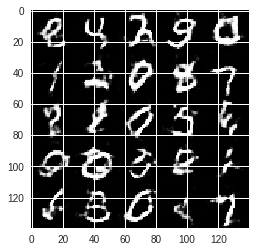

Epoch 1/2... Discriminator Loss: 1.3219... Generator Loss: 0.5274
Epoch 1/2... Discriminator Loss: 0.7346... Generator Loss: 1.2851
Epoch 1/2... Discriminator Loss: 0.9842... Generator Loss: 0.8396
Epoch 1/2... Discriminator Loss: 1.1809... Generator Loss: 0.6700
Epoch 1/2... Discriminator Loss: 1.3739... Generator Loss: 0.5581
Epoch 1/2... Discriminator Loss: 1.2016... Generator Loss: 0.5993
Epoch 1/2... Discriminator Loss: 1.2319... Generator Loss: 0.6654
Epoch 1/2... Discriminator Loss: 1.2333... Generator Loss: 0.6489
Epoch 1/2... Discriminator Loss: 0.8701... Generator Loss: 1.6232
Epoch 1/2... Discriminator Loss: 0.6330... Generator Loss: 1.6676


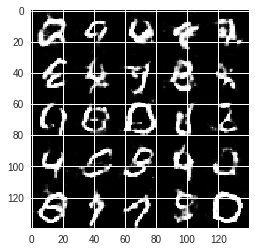

Epoch 1/2... Discriminator Loss: 1.4218... Generator Loss: 0.4816
Epoch 1/2... Discriminator Loss: 0.7055... Generator Loss: 1.5858
Epoch 1/2... Discriminator Loss: 0.9158... Generator Loss: 1.2737
Epoch 1/2... Discriminator Loss: 0.8315... Generator Loss: 1.9383
Epoch 1/2... Discriminator Loss: 1.8659... Generator Loss: 0.3241
Epoch 1/2... Discriminator Loss: 1.3529... Generator Loss: 0.5043
Epoch 1/2... Discriminator Loss: 1.5450... Generator Loss: 0.4158
Epoch 1/2... Discriminator Loss: 0.7895... Generator Loss: 1.2720
Epoch 1/2... Discriminator Loss: 1.2314... Generator Loss: 0.6216
Epoch 1/2... Discriminator Loss: 1.6234... Generator Loss: 0.3526


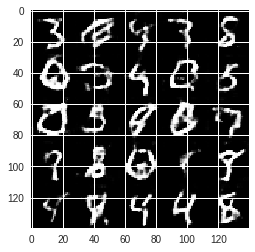

Epoch 1/2... Discriminator Loss: 1.1008... Generator Loss: 0.7246
Epoch 1/2... Discriminator Loss: 1.1381... Generator Loss: 0.7230
Epoch 1/2... Discriminator Loss: 0.8813... Generator Loss: 1.0073
Epoch 1/2... Discriminator Loss: 0.6218... Generator Loss: 1.5932
Epoch 1/2... Discriminator Loss: 0.7492... Generator Loss: 1.2780
Epoch 1/2... Discriminator Loss: 1.2821... Generator Loss: 0.6607
Epoch 1/2... Discriminator Loss: 0.7179... Generator Loss: 1.4262
Epoch 1/2... Discriminator Loss: 0.7678... Generator Loss: 1.2379
Epoch 1/2... Discriminator Loss: 1.0212... Generator Loss: 0.7857
Epoch 1/2... Discriminator Loss: 0.6285... Generator Loss: 1.6730


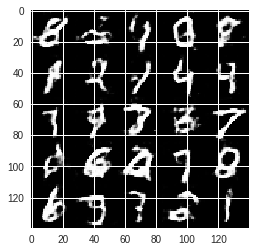

Epoch 1/2... Discriminator Loss: 0.8072... Generator Loss: 1.9289
Epoch 1/2... Discriminator Loss: 0.6427... Generator Loss: 1.5505
Epoch 1/2... Discriminator Loss: 0.7300... Generator Loss: 1.3077
Epoch 1/2... Discriminator Loss: 1.0176... Generator Loss: 0.8019
Epoch 1/2... Discriminator Loss: 1.2399... Generator Loss: 0.5965
Epoch 1/2... Discriminator Loss: 0.6595... Generator Loss: 1.4772
Epoch 1/2... Discriminator Loss: 0.7526... Generator Loss: 1.4499
Epoch 1/2... Discriminator Loss: 0.6769... Generator Loss: 1.4579
Epoch 1/2... Discriminator Loss: 1.3662... Generator Loss: 0.5115
Epoch 1/2... Discriminator Loss: 1.6128... Generator Loss: 0.4325


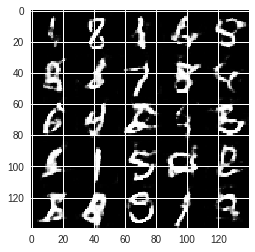

Epoch 1/2... Discriminator Loss: 0.6160... Generator Loss: 1.5758
Epoch 1/2... Discriminator Loss: 0.8539... Generator Loss: 1.0299
Epoch 1/2... Discriminator Loss: 0.6942... Generator Loss: 1.3420
Epoch 1/2... Discriminator Loss: 0.8467... Generator Loss: 1.1798
Epoch 1/2... Discriminator Loss: 0.7417... Generator Loss: 1.2630
Epoch 1/2... Discriminator Loss: 0.7942... Generator Loss: 1.4880
Epoch 1/2... Discriminator Loss: 0.6977... Generator Loss: 1.4669
Epoch 1/2... Discriminator Loss: 0.8749... Generator Loss: 1.0223
Epoch 1/2... Discriminator Loss: 0.7345... Generator Loss: 1.3072
Epoch 1/2... Discriminator Loss: 0.6313... Generator Loss: 1.5255


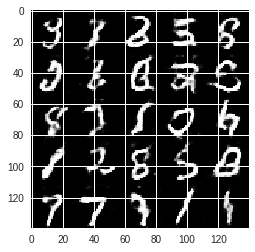

Epoch 1/2... Discriminator Loss: 1.0573... Generator Loss: 0.7492
Epoch 1/2... Discriminator Loss: 2.0587... Generator Loss: 0.3875
Epoch 1/2... Discriminator Loss: 1.2465... Generator Loss: 0.6420
Epoch 1/2... Discriminator Loss: 0.7425... Generator Loss: 1.2886
Epoch 1/2... Discriminator Loss: 0.7252... Generator Loss: 1.3071
Epoch 1/2... Discriminator Loss: 0.6537... Generator Loss: 1.5538
Epoch 1/2... Discriminator Loss: 1.3821... Generator Loss: 0.4909
Epoch 1/2... Discriminator Loss: 0.6238... Generator Loss: 1.6954
Epoch 1/2... Discriminator Loss: 0.6250... Generator Loss: 1.5960
Epoch 1/2... Discriminator Loss: 0.8293... Generator Loss: 1.1192


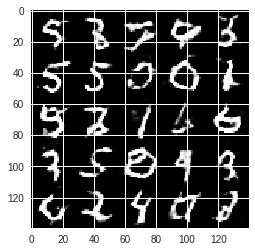

Epoch 1/2... Discriminator Loss: 1.4678... Generator Loss: 0.4579
Epoch 1/2... Discriminator Loss: 0.6787... Generator Loss: 1.4267
Epoch 1/2... Discriminator Loss: 0.9860... Generator Loss: 0.8785
Epoch 1/2... Discriminator Loss: 0.6107... Generator Loss: 1.6853
Epoch 1/2... Discriminator Loss: 0.7435... Generator Loss: 1.3447
Epoch 1/2... Discriminator Loss: 1.6119... Generator Loss: 0.4127
Epoch 1/2... Discriminator Loss: 0.6020... Generator Loss: 2.0898
Epoch 1/2... Discriminator Loss: 0.7242... Generator Loss: 2.2223
Epoch 1/2... Discriminator Loss: 0.9872... Generator Loss: 0.9509
Epoch 1/2... Discriminator Loss: 1.1894... Generator Loss: 0.6372


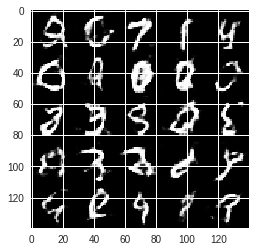

Epoch 1/2... Discriminator Loss: 0.6953... Generator Loss: 1.3778
Epoch 1/2... Discriminator Loss: 0.6906... Generator Loss: 1.2961
Epoch 1/2... Discriminator Loss: 0.8136... Generator Loss: 1.0552
Epoch 1/2... Discriminator Loss: 1.3836... Generator Loss: 0.5058
Epoch 1/2... Discriminator Loss: 0.8433... Generator Loss: 1.0326
Epoch 1/2... Discriminator Loss: 0.6306... Generator Loss: 1.7880
Epoch 1/2... Discriminator Loss: 1.2032... Generator Loss: 0.6494
Epoch 1/2... Discriminator Loss: 0.6480... Generator Loss: 2.1316
Epoch 1/2... Discriminator Loss: 0.8513... Generator Loss: 1.1093
Epoch 1/2... Discriminator Loss: 0.6128... Generator Loss: 1.6726


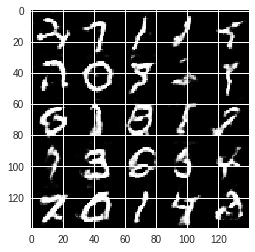

Epoch 1/2... Discriminator Loss: 0.7792... Generator Loss: 1.1501
Epoch 1/2... Discriminator Loss: 0.6852... Generator Loss: 2.2939
Epoch 1/2... Discriminator Loss: 0.9590... Generator Loss: 3.0798
Epoch 1/2... Discriminator Loss: 2.3688... Generator Loss: 0.2648
Epoch 1/2... Discriminator Loss: 0.8586... Generator Loss: 1.0626
Epoch 1/2... Discriminator Loss: 1.0257... Generator Loss: 0.7806
Epoch 1/2... Discriminator Loss: 0.6870... Generator Loss: 1.3737
Epoch 1/2... Discriminator Loss: 1.1438... Generator Loss: 0.7201
Epoch 1/2... Discriminator Loss: 0.7077... Generator Loss: 1.4026
Epoch 1/2... Discriminator Loss: 0.8153... Generator Loss: 1.0939


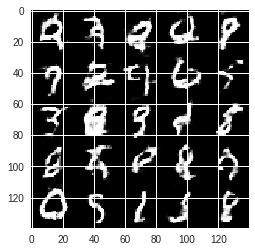

Epoch 1/2... Discriminator Loss: 0.6881... Generator Loss: 1.5107
Epoch 1/2... Discriminator Loss: 0.8243... Generator Loss: 1.1752
Epoch 1/2... Discriminator Loss: 1.0315... Generator Loss: 0.7802
Epoch 1/2... Discriminator Loss: 0.6379... Generator Loss: 1.5316
Epoch 1/2... Discriminator Loss: 0.7100... Generator Loss: 1.4549
Epoch 1/2... Discriminator Loss: 0.8881... Generator Loss: 0.9753
Epoch 1/2... Discriminator Loss: 0.8181... Generator Loss: 1.1694
Epoch 1/2... Discriminator Loss: 0.7628... Generator Loss: 1.1611
Epoch 1/2... Discriminator Loss: 0.6473... Generator Loss: 1.4315
Epoch 1/2... Discriminator Loss: 0.7048... Generator Loss: 1.5345


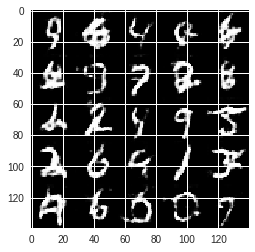

Epoch 1/2... Discriminator Loss: 0.8510... Generator Loss: 1.2156
Epoch 1/2... Discriminator Loss: 0.5615... Generator Loss: 1.8972
Epoch 1/2... Discriminator Loss: 2.7148... Generator Loss: 0.1297
Epoch 1/2... Discriminator Loss: 0.7187... Generator Loss: 1.4295
Epoch 1/2... Discriminator Loss: 0.6737... Generator Loss: 1.5583
Epoch 1/2... Discriminator Loss: 1.1978... Generator Loss: 0.6672
Epoch 1/2... Discriminator Loss: 0.8374... Generator Loss: 1.0650
Epoch 1/2... Discriminator Loss: 0.8737... Generator Loss: 1.0340
Epoch 1/2... Discriminator Loss: 0.7771... Generator Loss: 1.2030
Epoch 1/2... Discriminator Loss: 1.0811... Generator Loss: 0.7125


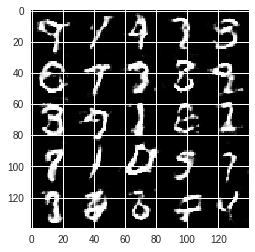

Epoch 1/2... Discriminator Loss: 0.6892... Generator Loss: 1.3274
Epoch 1/2... Discriminator Loss: 0.6825... Generator Loss: 1.4335
Epoch 1/2... Discriminator Loss: 0.7969... Generator Loss: 1.1246
Epoch 1/2... Discriminator Loss: 0.7459... Generator Loss: 1.2614
Epoch 1/2... Discriminator Loss: 0.7746... Generator Loss: 1.2497
Epoch 1/2... Discriminator Loss: 0.7245... Generator Loss: 1.2412
Epoch 1/2... Discriminator Loss: 0.8526... Generator Loss: 1.0616
Epoch 1/2... Discriminator Loss: 0.5969... Generator Loss: 1.6232
Epoch 1/2... Discriminator Loss: 0.6567... Generator Loss: 1.4340
Epoch 1/2... Discriminator Loss: 0.7411... Generator Loss: 1.1737


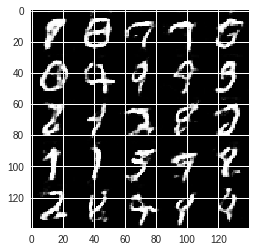

Epoch 1/2... Discriminator Loss: 0.8147... Generator Loss: 1.1264
Epoch 1/2... Discriminator Loss: 0.7457... Generator Loss: 1.2151
Epoch 1/2... Discriminator Loss: 1.1413... Generator Loss: 0.7144
Epoch 1/2... Discriminator Loss: 0.6100... Generator Loss: 1.6481
Epoch 1/2... Discriminator Loss: 0.5758... Generator Loss: 2.2359
Epoch 1/2... Discriminator Loss: 2.2687... Generator Loss: 0.2830
Epoch 1/2... Discriminator Loss: 0.6042... Generator Loss: 1.6026
Epoch 1/2... Discriminator Loss: 0.6691... Generator Loss: 1.4807
Epoch 1/2... Discriminator Loss: 1.0905... Generator Loss: 0.8128
Epoch 1/2... Discriminator Loss: 0.9334... Generator Loss: 0.9632


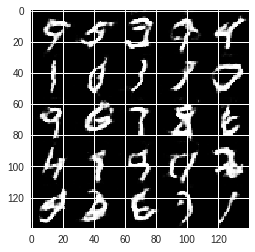

Epoch 1/2... Discriminator Loss: 0.6360... Generator Loss: 1.5171
Epoch 1/2... Discriminator Loss: 0.9383... Generator Loss: 0.9846
Epoch 1/2... Discriminator Loss: 0.7128... Generator Loss: 1.6509
Epoch 1/2... Discriminator Loss: 0.6416... Generator Loss: 1.6257
Epoch 1/2... Discriminator Loss: 0.7840... Generator Loss: 1.1799
Epoch 1/2... Discriminator Loss: 0.6479... Generator Loss: 1.6152
Epoch 1/2... Discriminator Loss: 0.5687... Generator Loss: 1.7184
Epoch 1/2... Discriminator Loss: 0.5848... Generator Loss: 1.8656
Epoch 1/2... Discriminator Loss: 1.0504... Generator Loss: 0.7597
Epoch 1/2... Discriminator Loss: 0.8103... Generator Loss: 1.1887


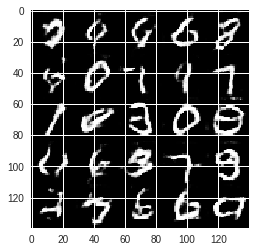

Epoch 1/2... Discriminator Loss: 1.0072... Generator Loss: 1.1016
Epoch 1/2... Discriminator Loss: 0.6575... Generator Loss: 1.4885
Epoch 1/2... Discriminator Loss: 0.6747... Generator Loss: 1.3939
Epoch 1/2... Discriminator Loss: 0.8883... Generator Loss: 1.0160
Epoch 1/2... Discriminator Loss: 0.6748... Generator Loss: 1.4312
Epoch 2/2... Discriminator Loss: 0.7723... Generator Loss: 1.1527
Epoch 2/2... Discriminator Loss: 0.6708... Generator Loss: 1.4875
Epoch 2/2... Discriminator Loss: 0.5655... Generator Loss: 1.8149
Epoch 2/2... Discriminator Loss: 1.0961... Generator Loss: 0.7497
Epoch 2/2... Discriminator Loss: 0.6244... Generator Loss: 1.6218


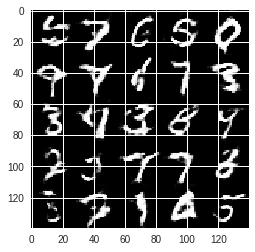

Epoch 2/2... Discriminator Loss: 2.9712... Generator Loss: 0.1365
Epoch 2/2... Discriminator Loss: 1.1519... Generator Loss: 0.7545
Epoch 2/2... Discriminator Loss: 0.6312... Generator Loss: 1.5424
Epoch 2/2... Discriminator Loss: 0.7350... Generator Loss: 1.2559
Epoch 2/2... Discriminator Loss: 1.0686... Generator Loss: 0.8625
Epoch 2/2... Discriminator Loss: 0.8679... Generator Loss: 1.0786
Epoch 2/2... Discriminator Loss: 0.7534... Generator Loss: 1.2137
Epoch 2/2... Discriminator Loss: 1.7042... Generator Loss: 0.3684
Epoch 2/2... Discriminator Loss: 0.6086... Generator Loss: 1.7852
Epoch 2/2... Discriminator Loss: 0.8507... Generator Loss: 0.9863


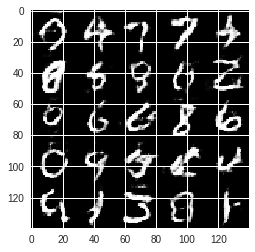

Epoch 2/2... Discriminator Loss: 1.4957... Generator Loss: 0.4813
Epoch 2/2... Discriminator Loss: 0.4881... Generator Loss: 2.1724
Epoch 2/2... Discriminator Loss: 0.6264... Generator Loss: 1.5684
Epoch 2/2... Discriminator Loss: 0.6611... Generator Loss: 1.6779
Epoch 2/2... Discriminator Loss: 1.1225... Generator Loss: 0.7688
Epoch 2/2... Discriminator Loss: 0.7205... Generator Loss: 1.4310
Epoch 2/2... Discriminator Loss: 0.9703... Generator Loss: 0.8874
Epoch 2/2... Discriminator Loss: 0.5933... Generator Loss: 1.5888
Epoch 2/2... Discriminator Loss: 0.6941... Generator Loss: 1.3799
Epoch 2/2... Discriminator Loss: 0.6217... Generator Loss: 1.5282


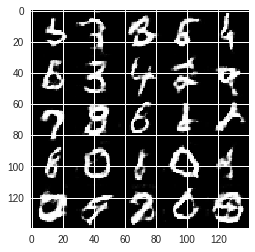

Epoch 2/2... Discriminator Loss: 0.7490... Generator Loss: 1.2384
Epoch 2/2... Discriminator Loss: 0.9224... Generator Loss: 0.9223
Epoch 2/2... Discriminator Loss: 0.9220... Generator Loss: 0.9342
Epoch 2/2... Discriminator Loss: 0.5847... Generator Loss: 1.7536
Epoch 2/2... Discriminator Loss: 1.2748... Generator Loss: 0.6763
Epoch 2/2... Discriminator Loss: 0.9330... Generator Loss: 0.9316
Epoch 2/2... Discriminator Loss: 0.6061... Generator Loss: 1.6087
Epoch 2/2... Discriminator Loss: 0.5201... Generator Loss: 2.0553
Epoch 2/2... Discriminator Loss: 0.8749... Generator Loss: 1.0463
Epoch 2/2... Discriminator Loss: 0.9167... Generator Loss: 0.9877


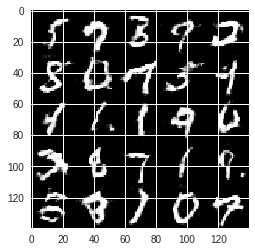

Epoch 2/2... Discriminator Loss: 0.6379... Generator Loss: 1.8123
Epoch 2/2... Discriminator Loss: 0.7165... Generator Loss: 1.2252
Epoch 2/2... Discriminator Loss: 0.5475... Generator Loss: 2.3277
Epoch 2/2... Discriminator Loss: 1.4949... Generator Loss: 3.6878
Epoch 2/2... Discriminator Loss: 0.9861... Generator Loss: 2.0867
Epoch 2/2... Discriminator Loss: 0.7560... Generator Loss: 1.8333
Epoch 2/2... Discriminator Loss: 1.1393... Generator Loss: 0.7745
Epoch 2/2... Discriminator Loss: 0.7798... Generator Loss: 1.1373
Epoch 2/2... Discriminator Loss: 0.6812... Generator Loss: 1.3364
Epoch 2/2... Discriminator Loss: 0.8204... Generator Loss: 1.2109


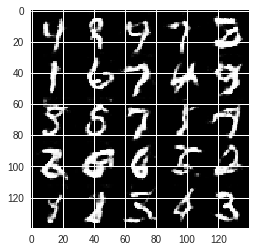

Epoch 2/2... Discriminator Loss: 0.9857... Generator Loss: 0.8947
Epoch 2/2... Discriminator Loss: 0.6989... Generator Loss: 1.3262
Epoch 2/2... Discriminator Loss: 0.7212... Generator Loss: 1.2548
Epoch 2/2... Discriminator Loss: 0.5810... Generator Loss: 1.6695
Epoch 2/2... Discriminator Loss: 0.6868... Generator Loss: 1.3244
Epoch 2/2... Discriminator Loss: 0.4975... Generator Loss: 2.0155
Epoch 2/2... Discriminator Loss: 0.9459... Generator Loss: 0.9155
Epoch 2/2... Discriminator Loss: 0.6680... Generator Loss: 1.4924
Epoch 2/2... Discriminator Loss: 0.8488... Generator Loss: 1.0383
Epoch 2/2... Discriminator Loss: 0.8829... Generator Loss: 0.9947


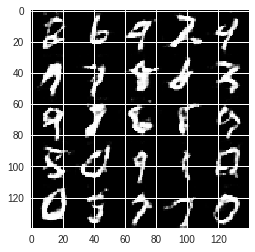

Epoch 2/2... Discriminator Loss: 0.8356... Generator Loss: 1.0847
Epoch 2/2... Discriminator Loss: 0.7681... Generator Loss: 1.1831
Epoch 2/2... Discriminator Loss: 0.6971... Generator Loss: 1.3329
Epoch 2/2... Discriminator Loss: 0.9312... Generator Loss: 0.9709
Epoch 2/2... Discriminator Loss: 0.7046... Generator Loss: 1.4664
Epoch 2/2... Discriminator Loss: 1.0750... Generator Loss: 0.7848
Epoch 2/2... Discriminator Loss: 1.1811... Generator Loss: 0.6951
Epoch 2/2... Discriminator Loss: 0.7914... Generator Loss: 1.1281
Epoch 2/2... Discriminator Loss: 0.4309... Generator Loss: 2.4885
Epoch 2/2... Discriminator Loss: 1.1160... Generator Loss: 0.6839


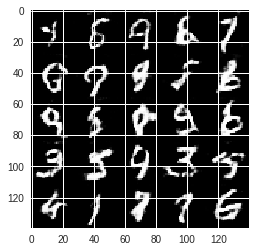

Epoch 2/2... Discriminator Loss: 0.6756... Generator Loss: 1.3925
Epoch 2/2... Discriminator Loss: 0.7896... Generator Loss: 1.1707
Epoch 2/2... Discriminator Loss: 0.8243... Generator Loss: 1.0435
Epoch 2/2... Discriminator Loss: 0.6276... Generator Loss: 1.4772
Epoch 2/2... Discriminator Loss: 0.8034... Generator Loss: 1.4211
Epoch 2/2... Discriminator Loss: 0.6069... Generator Loss: 1.6667
Epoch 2/2... Discriminator Loss: 0.9586... Generator Loss: 0.9223
Epoch 2/2... Discriminator Loss: 1.5410... Generator Loss: 0.5332
Epoch 2/2... Discriminator Loss: 0.5363... Generator Loss: 1.7933
Epoch 2/2... Discriminator Loss: 0.4667... Generator Loss: 2.4403


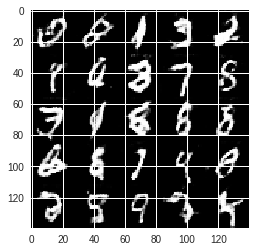

Epoch 2/2... Discriminator Loss: 0.7050... Generator Loss: 1.3742
Epoch 2/2... Discriminator Loss: 0.5680... Generator Loss: 1.7319
Epoch 2/2... Discriminator Loss: 0.8235... Generator Loss: 1.1116
Epoch 2/2... Discriminator Loss: 0.8865... Generator Loss: 2.8672
Epoch 2/2... Discriminator Loss: 0.6756... Generator Loss: 2.7326
Epoch 2/2... Discriminator Loss: 0.7375... Generator Loss: 1.2459
Epoch 2/2... Discriminator Loss: 0.5848... Generator Loss: 1.6926
Epoch 2/2... Discriminator Loss: 0.9335... Generator Loss: 0.9065
Epoch 2/2... Discriminator Loss: 0.8451... Generator Loss: 1.2131
Epoch 2/2... Discriminator Loss: 1.0575... Generator Loss: 0.7854


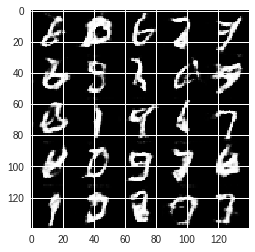

Epoch 2/2... Discriminator Loss: 0.6524... Generator Loss: 1.5085
Epoch 2/2... Discriminator Loss: 0.5514... Generator Loss: 2.1694
Epoch 2/2... Discriminator Loss: 0.6182... Generator Loss: 1.6533
Epoch 2/2... Discriminator Loss: 0.5873... Generator Loss: 1.6804
Epoch 2/2... Discriminator Loss: 0.6414... Generator Loss: 1.4386
Epoch 2/2... Discriminator Loss: 0.7484... Generator Loss: 1.1704
Epoch 2/2... Discriminator Loss: 0.8239... Generator Loss: 1.0288
Epoch 2/2... Discriminator Loss: 0.5268... Generator Loss: 1.9856
Epoch 2/2... Discriminator Loss: 0.8296... Generator Loss: 1.0802
Epoch 2/2... Discriminator Loss: 0.5623... Generator Loss: 2.0156


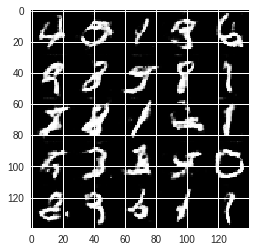

Epoch 2/2... Discriminator Loss: 0.6386... Generator Loss: 1.4660
Epoch 2/2... Discriminator Loss: 0.5761... Generator Loss: 1.7025
Epoch 2/2... Discriminator Loss: 1.0668... Generator Loss: 0.7786
Epoch 2/2... Discriminator Loss: 0.7413... Generator Loss: 1.2069
Epoch 2/2... Discriminator Loss: 0.5053... Generator Loss: 2.1290
Epoch 2/2... Discriminator Loss: 0.7942... Generator Loss: 1.1719
Epoch 2/2... Discriminator Loss: 0.6545... Generator Loss: 2.0412
Epoch 2/2... Discriminator Loss: 1.5994... Generator Loss: 0.4157
Epoch 2/2... Discriminator Loss: 0.6316... Generator Loss: 1.6375
Epoch 2/2... Discriminator Loss: 0.9211... Generator Loss: 0.9566


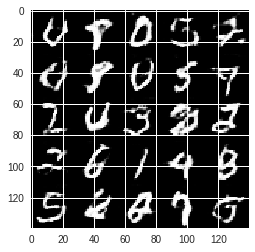

Epoch 2/2... Discriminator Loss: 0.4874... Generator Loss: 2.1599
Epoch 2/2... Discriminator Loss: 0.8769... Generator Loss: 0.9860
Epoch 2/2... Discriminator Loss: 1.5465... Generator Loss: 0.5081
Epoch 2/2... Discriminator Loss: 0.5479... Generator Loss: 1.7946
Epoch 2/2... Discriminator Loss: 1.1004... Generator Loss: 0.7816
Epoch 2/2... Discriminator Loss: 0.5983... Generator Loss: 1.6877
Epoch 2/2... Discriminator Loss: 0.9252... Generator Loss: 0.9945
Epoch 2/2... Discriminator Loss: 0.5858... Generator Loss: 1.7460
Epoch 2/2... Discriminator Loss: 0.6462... Generator Loss: 1.4207
Epoch 2/2... Discriminator Loss: 1.0972... Generator Loss: 0.7013


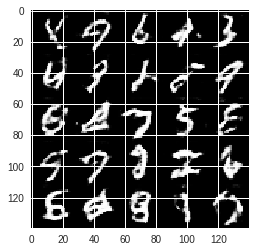

Epoch 2/2... Discriminator Loss: 0.4373... Generator Loss: 2.5722
Epoch 2/2... Discriminator Loss: 0.6316... Generator Loss: 1.5426
Epoch 2/2... Discriminator Loss: 2.0377... Generator Loss: 0.3272
Epoch 2/2... Discriminator Loss: 0.7625... Generator Loss: 1.2362
Epoch 2/2... Discriminator Loss: 0.6825... Generator Loss: 1.4277
Epoch 2/2... Discriminator Loss: 0.6346... Generator Loss: 1.5491
Epoch 2/2... Discriminator Loss: 0.8051... Generator Loss: 1.1193
Epoch 2/2... Discriminator Loss: 1.4448... Generator Loss: 0.6703
Epoch 2/2... Discriminator Loss: 0.6912... Generator Loss: 1.4650
Epoch 2/2... Discriminator Loss: 0.5671... Generator Loss: 1.7451


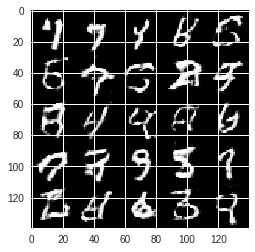

Epoch 2/2... Discriminator Loss: 1.0019... Generator Loss: 0.8626
Epoch 2/2... Discriminator Loss: 1.3103... Generator Loss: 0.6137
Epoch 2/2... Discriminator Loss: 1.4759... Generator Loss: 0.5082
Epoch 2/2... Discriminator Loss: 0.6117... Generator Loss: 1.6424
Epoch 2/2... Discriminator Loss: 0.4991... Generator Loss: 2.5595
Epoch 2/2... Discriminator Loss: 1.8004... Generator Loss: 4.0752
Epoch 2/2... Discriminator Loss: 0.9844... Generator Loss: 0.9960
Epoch 2/2... Discriminator Loss: 0.9260... Generator Loss: 1.1338
Epoch 2/2... Discriminator Loss: 0.6116... Generator Loss: 1.6483
Epoch 2/2... Discriminator Loss: 0.6845... Generator Loss: 1.3238


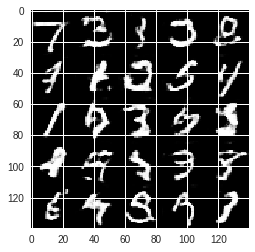

Epoch 2/2... Discriminator Loss: 1.3589... Generator Loss: 0.5551
Epoch 2/2... Discriminator Loss: 0.5974... Generator Loss: 1.7213
Epoch 2/2... Discriminator Loss: 0.6511... Generator Loss: 2.2350
Epoch 2/2... Discriminator Loss: 0.5883... Generator Loss: 1.6181
Epoch 2/2... Discriminator Loss: 0.4496... Generator Loss: 2.3938
Epoch 2/2... Discriminator Loss: 0.5412... Generator Loss: 1.8551
Epoch 2/2... Discriminator Loss: 0.5631... Generator Loss: 1.7286
Epoch 2/2... Discriminator Loss: 0.5829... Generator Loss: 1.9729
Epoch 2/2... Discriminator Loss: 0.6201... Generator Loss: 1.5307
Epoch 2/2... Discriminator Loss: 0.5374... Generator Loss: 1.9904


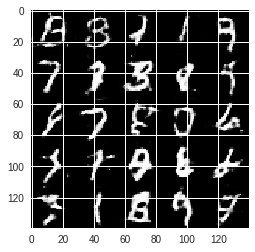

Epoch 2/2... Discriminator Loss: 0.5112... Generator Loss: 1.9907
Epoch 2/2... Discriminator Loss: 0.6770... Generator Loss: 1.5178
Epoch 2/2... Discriminator Loss: 0.5203... Generator Loss: 2.5078
Epoch 2/2... Discriminator Loss: 1.6995... Generator Loss: 4.0920
Epoch 2/2... Discriminator Loss: 1.3494... Generator Loss: 0.5661
Epoch 2/2... Discriminator Loss: 0.6481... Generator Loss: 1.5141
Epoch 2/2... Discriminator Loss: 1.0669... Generator Loss: 0.7692
Epoch 2/2... Discriminator Loss: 0.6597... Generator Loss: 1.4288
Epoch 2/2... Discriminator Loss: 0.5460... Generator Loss: 1.8550
Epoch 2/2... Discriminator Loss: 0.4378... Generator Loss: 2.6118


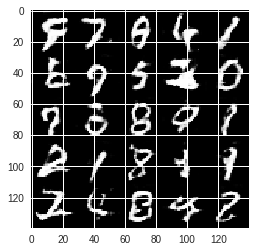

Epoch 2/2... Discriminator Loss: 1.0525... Generator Loss: 0.9995
Epoch 2/2... Discriminator Loss: 0.5993... Generator Loss: 1.6109
Epoch 2/2... Discriminator Loss: 0.9953... Generator Loss: 0.8615
Epoch 2/2... Discriminator Loss: 0.4422... Generator Loss: 2.4896
Epoch 2/2... Discriminator Loss: 0.5141... Generator Loss: 2.0063
Epoch 2/2... Discriminator Loss: 0.6433... Generator Loss: 1.6841
Epoch 2/2... Discriminator Loss: 0.6222... Generator Loss: 1.6538
Epoch 2/2... Discriminator Loss: 1.0288... Generator Loss: 0.7901
Epoch 2/2... Discriminator Loss: 0.7959... Generator Loss: 1.1998
Epoch 2/2... Discriminator Loss: 0.5868... Generator Loss: 1.6998


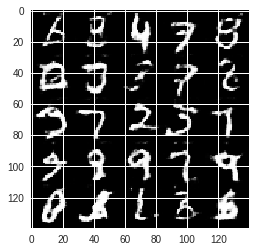

Epoch 2/2... Discriminator Loss: 0.4320... Generator Loss: 2.7096
Epoch 2/2... Discriminator Loss: 0.5800... Generator Loss: 2.6861
Epoch 2/2... Discriminator Loss: 0.4775... Generator Loss: 2.3536
Epoch 2/2... Discriminator Loss: 0.5462... Generator Loss: 1.7542
Epoch 2/2... Discriminator Loss: 0.5835... Generator Loss: 1.7164
Epoch 2/2... Discriminator Loss: 0.5331... Generator Loss: 2.0384
Epoch 2/2... Discriminator Loss: 0.6137... Generator Loss: 1.6479
Epoch 2/2... Discriminator Loss: 0.6414... Generator Loss: 1.5829
Epoch 2/2... Discriminator Loss: 0.6655... Generator Loss: 1.3395
Epoch 2/2... Discriminator Loss: 0.7541... Generator Loss: 1.2267


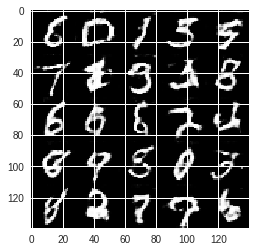

Epoch 2/2... Discriminator Loss: 0.5681... Generator Loss: 1.8266
Epoch 2/2... Discriminator Loss: 0.5504... Generator Loss: 1.8274
Epoch 2/2... Discriminator Loss: 0.7074... Generator Loss: 1.2995
Epoch 2/2... Discriminator Loss: 0.8157... Generator Loss: 1.1258
Epoch 2/2... Discriminator Loss: 0.8249... Generator Loss: 1.1102
Epoch 2/2... Discriminator Loss: 0.7533... Generator Loss: 1.2211
Epoch 2/2... Discriminator Loss: 0.6175... Generator Loss: 1.6125
Epoch 2/2... Discriminator Loss: 0.8622... Generator Loss: 1.0958
Epoch 2/2... Discriminator Loss: 0.7156... Generator Loss: 1.2396
Epoch 2/2... Discriminator Loss: 0.4222... Generator Loss: 2.6997


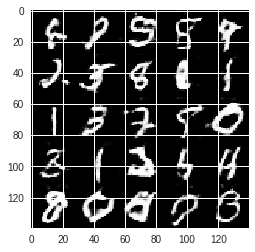

Epoch 2/2... Discriminator Loss: 0.4995... Generator Loss: 2.0893
Epoch 2/2... Discriminator Loss: 0.4559... Generator Loss: 2.3247
Epoch 2/2... Discriminator Loss: 0.8614... Generator Loss: 1.2315
Epoch 2/2... Discriminator Loss: 0.5002... Generator Loss: 2.5257
Epoch 2/2... Discriminator Loss: 0.7147... Generator Loss: 1.3541
Epoch 2/2... Discriminator Loss: 0.5352... Generator Loss: 1.8978
Epoch 2/2... Discriminator Loss: 1.3286... Generator Loss: 0.6177
Epoch 2/2... Discriminator Loss: 0.7020... Generator Loss: 2.3113
Epoch 2/2... Discriminator Loss: 0.6005... Generator Loss: 1.6555
Epoch 2/2... Discriminator Loss: 0.6430... Generator Loss: 2.8071


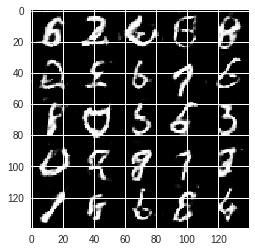

Epoch 2/2... Discriminator Loss: 1.2282... Generator Loss: 0.6723
Epoch 2/2... Discriminator Loss: 0.7352... Generator Loss: 1.2798
Epoch 2/2... Discriminator Loss: 0.5410... Generator Loss: 1.9273
Epoch 2/2... Discriminator Loss: 0.5184... Generator Loss: 2.0485
Epoch 2/2... Discriminator Loss: 0.4678... Generator Loss: 2.2785
Epoch 2/2... Discriminator Loss: 0.6488... Generator Loss: 1.5027
Epoch 2/2... Discriminator Loss: 0.7461... Generator Loss: 1.3640
Epoch 2/2... Discriminator Loss: 0.7209... Generator Loss: 1.2711
Epoch 2/2... Discriminator Loss: 0.7258... Generator Loss: 1.5013
Epoch 2/2... Discriminator Loss: 0.5656... Generator Loss: 1.6894


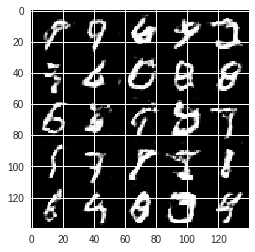

Epoch 2/2... Discriminator Loss: 0.6705... Generator Loss: 1.3506
Epoch 2/2... Discriminator Loss: 0.5292... Generator Loss: 1.9568
Epoch 2/2... Discriminator Loss: 0.5613... Generator Loss: 1.9790
Epoch 2/2... Discriminator Loss: 0.5703... Generator Loss: 1.7521
Epoch 2/2... Discriminator Loss: 0.6500... Generator Loss: 1.4863
Epoch 2/2... Discriminator Loss: 0.7006... Generator Loss: 1.3031
Epoch 2/2... Discriminator Loss: 0.6967... Generator Loss: 1.4839
Epoch 2/2... Discriminator Loss: 0.6590... Generator Loss: 1.4099
Epoch 2/2... Discriminator Loss: 0.9234... Generator Loss: 0.8976
Epoch 2/2... Discriminator Loss: 0.5846... Generator Loss: 1.6628


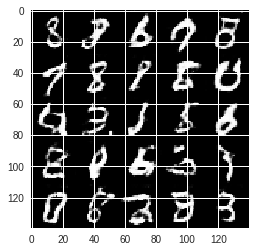

Epoch 2/2... Discriminator Loss: 0.9891... Generator Loss: 0.9118
Epoch 2/2... Discriminator Loss: 2.9268... Generator Loss: 0.2049
Epoch 2/2... Discriminator Loss: 0.6217... Generator Loss: 1.7493
Epoch 2/2... Discriminator Loss: 0.5079... Generator Loss: 1.9795
Epoch 2/2... Discriminator Loss: 0.5720... Generator Loss: 1.7081
Epoch 2/2... Discriminator Loss: 0.6541... Generator Loss: 1.4281
Epoch 2/2... Discriminator Loss: 0.5501... Generator Loss: 2.0545
Epoch 2/2... Discriminator Loss: 0.5806... Generator Loss: 1.8167
Epoch 2/2... Discriminator Loss: 0.6804... Generator Loss: 1.3874
Epoch 2/2... Discriminator Loss: 0.5929... Generator Loss: 1.6438


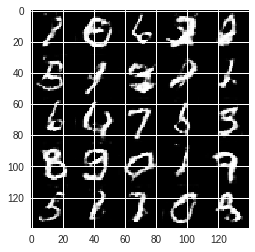

Epoch 2/2... Discriminator Loss: 0.6273... Generator Loss: 2.4769
Epoch 2/2... Discriminator Loss: 0.6009... Generator Loss: 1.7022
Epoch 2/2... Discriminator Loss: 0.5659... Generator Loss: 1.7074
Epoch 2/2... Discriminator Loss: 1.5923... Generator Loss: 0.4581
Epoch 2/2... Discriminator Loss: 0.9451... Generator Loss: 1.0338
Epoch 2/2... Discriminator Loss: 0.7179... Generator Loss: 1.2003
Epoch 2/2... Discriminator Loss: 0.5842... Generator Loss: 1.7734
Epoch 2/2... Discriminator Loss: 0.7458... Generator Loss: 1.2304
Epoch 2/2... Discriminator Loss: 1.0354... Generator Loss: 0.8351
Epoch 2/2... Discriminator Loss: 0.5881... Generator Loss: 1.6750


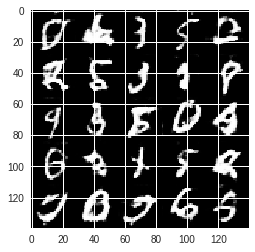

Epoch 2/2... Discriminator Loss: 1.3809... Generator Loss: 0.5807
Epoch 2/2... Discriminator Loss: 0.7779... Generator Loss: 1.1705
Epoch 2/2... Discriminator Loss: 1.5880... Generator Loss: 0.4445
Epoch 2/2... Discriminator Loss: 0.4979... Generator Loss: 2.2578
Epoch 2/2... Discriminator Loss: 0.4339... Generator Loss: 2.6327
Epoch 2/2... Discriminator Loss: 0.8143... Generator Loss: 1.1709
Epoch 2/2... Discriminator Loss: 0.6103... Generator Loss: 1.5822
Epoch 2/2... Discriminator Loss: 1.2967... Generator Loss: 0.7090
Epoch 2/2... Discriminator Loss: 0.6879... Generator Loss: 1.4195
Epoch 2/2... Discriminator Loss: 1.4521... Generator Loss: 0.6185


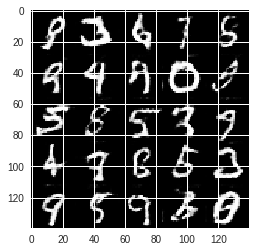

Epoch 2/2... Discriminator Loss: 0.5371... Generator Loss: 2.0112
Epoch 2/2... Discriminator Loss: 0.8428... Generator Loss: 1.0474
Epoch 2/2... Discriminator Loss: 0.5431... Generator Loss: 2.0314
Epoch 2/2... Discriminator Loss: 0.6162... Generator Loss: 1.5709
Epoch 2/2... Discriminator Loss: 1.0941... Generator Loss: 0.8343
Epoch 2/2... Discriminator Loss: 0.6099... Generator Loss: 1.9002
Epoch 2/2... Discriminator Loss: 0.5495... Generator Loss: 1.9533
Epoch 2/2... Discriminator Loss: 1.3347... Generator Loss: 0.6091
Epoch 2/2... Discriminator Loss: 0.6615... Generator Loss: 1.4169
Epoch 2/2... Discriminator Loss: 0.4807... Generator Loss: 2.1879


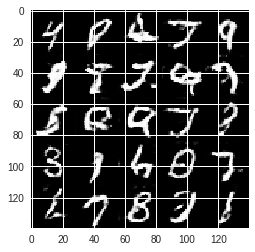

Epoch 2/2... Discriminator Loss: 0.8467... Generator Loss: 1.2424
Epoch 2/2... Discriminator Loss: 0.6602... Generator Loss: 1.4969
Epoch 2/2... Discriminator Loss: 0.4177... Generator Loss: 2.8235
Epoch 2/2... Discriminator Loss: 0.6665... Generator Loss: 1.4330
Epoch 2/2... Discriminator Loss: 0.7127... Generator Loss: 1.4025
Epoch 2/2... Discriminator Loss: 0.8562... Generator Loss: 0.9795
Epoch 2/2... Discriminator Loss: 0.5269... Generator Loss: 1.9454
Epoch 2/2... Discriminator Loss: 0.4352... Generator Loss: 2.7026
Epoch 2/2... Discriminator Loss: 0.7046... Generator Loss: 1.4558
Epoch 2/2... Discriminator Loss: 1.9453... Generator Loss: 0.3416


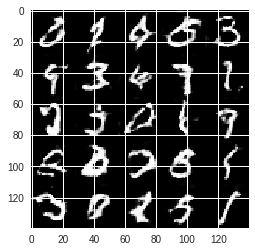

Epoch 2/2... Discriminator Loss: 0.3889... Generator Loss: 3.6816
Epoch 2/2... Discriminator Loss: 0.9141... Generator Loss: 1.0033
Epoch 2/2... Discriminator Loss: 0.5798... Generator Loss: 1.6123
Epoch 2/2... Discriminator Loss: 0.5629... Generator Loss: 1.7392
Epoch 2/2... Discriminator Loss: 0.7871... Generator Loss: 1.0940
Epoch 2/2... Discriminator Loss: 0.5932... Generator Loss: 1.6784
Epoch 2/2... Discriminator Loss: 0.6007... Generator Loss: 1.5367
Epoch 2/2... Discriminator Loss: 0.6383... Generator Loss: 1.5652
Epoch 2/2... Discriminator Loss: 1.0139... Generator Loss: 0.9874
Epoch 2/2... Discriminator Loss: 0.6893... Generator Loss: 1.3248


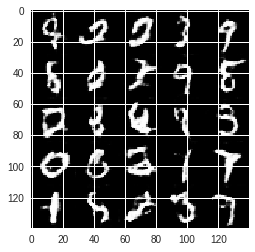

Epoch 2/2... Discriminator Loss: 0.9537... Generator Loss: 0.8765
Epoch 2/2... Discriminator Loss: 0.4287... Generator Loss: 2.6437
Epoch 2/2... Discriminator Loss: 0.5875... Generator Loss: 1.6796
Epoch 2/2... Discriminator Loss: 0.5633... Generator Loss: 1.8479
Epoch 2/2... Discriminator Loss: 0.4989... Generator Loss: 2.1803
Epoch 2/2... Discriminator Loss: 1.1021... Generator Loss: 0.8956
Epoch 2/2... Discriminator Loss: 0.7666... Generator Loss: 1.4070
Epoch 2/2... Discriminator Loss: 0.8334... Generator Loss: 1.0271
Epoch 2/2... Discriminator Loss: 0.6223... Generator Loss: 1.5795
Epoch 2/2... Discriminator Loss: 0.5478... Generator Loss: 1.9429


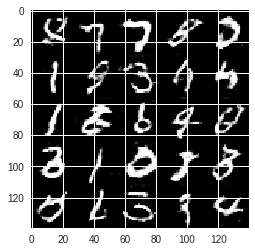

Epoch 2/2... Discriminator Loss: 0.4830... Generator Loss: 2.2738
Epoch 2/2... Discriminator Loss: 0.9208... Generator Loss: 0.9954
Epoch 2/2... Discriminator Loss: 0.4414... Generator Loss: 2.6109
Epoch 2/2... Discriminator Loss: 1.6279... Generator Loss: 0.4801
Epoch 2/2... Discriminator Loss: 0.5748... Generator Loss: 1.9818
Epoch 2/2... Discriminator Loss: 0.6838... Generator Loss: 1.6056
Epoch 2/2... Discriminator Loss: 2.0057... Generator Loss: 0.3940
Epoch 2/2... Discriminator Loss: 0.5940... Generator Loss: 1.6835
Epoch 2/2... Discriminator Loss: 0.4977... Generator Loss: 2.0652
Epoch 2/2... Discriminator Loss: 0.8359... Generator Loss: 1.3404


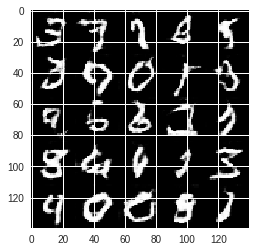

Epoch 2/2... Discriminator Loss: 1.1394... Generator Loss: 0.7230
Epoch 2/2... Discriminator Loss: 0.4411... Generator Loss: 2.7011
Epoch 2/2... Discriminator Loss: 1.1835... Generator Loss: 0.7057
Epoch 2/2... Discriminator Loss: 0.6082... Generator Loss: 1.6494
Epoch 2/2... Discriminator Loss: 0.6328... Generator Loss: 1.4746
Epoch 2/2... Discriminator Loss: 0.5536... Generator Loss: 1.7698
Epoch 2/2... Discriminator Loss: 0.4619... Generator Loss: 2.3983
Epoch 2/2... Discriminator Loss: 0.7015... Generator Loss: 1.2988
Epoch 2/2... Discriminator Loss: 0.6416... Generator Loss: 1.3915
Epoch 2/2... Discriminator Loss: 0.5868... Generator Loss: 1.6032


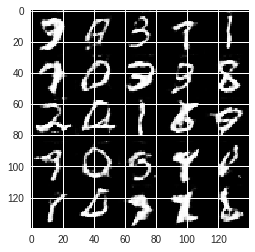

Epoch 2/2... Discriminator Loss: 0.7970... Generator Loss: 2.5553
Epoch 2/2... Discriminator Loss: 1.6119... Generator Loss: 0.5366
Epoch 2/2... Discriminator Loss: 0.5790... Generator Loss: 1.8877
Epoch 2/2... Discriminator Loss: 0.5607... Generator Loss: 1.7287
Epoch 2/2... Discriminator Loss: 0.7721... Generator Loss: 1.2706
Epoch 2/2... Discriminator Loss: 0.5576... Generator Loss: 2.3331
Epoch 2/2... Discriminator Loss: 2.6556... Generator Loss: 0.2891
Epoch 2/2... Discriminator Loss: 1.2304... Generator Loss: 4.3940
Epoch 2/2... Discriminator Loss: 0.7635... Generator Loss: 1.2587
Epoch 2/2... Discriminator Loss: 0.7371... Generator Loss: 1.2606


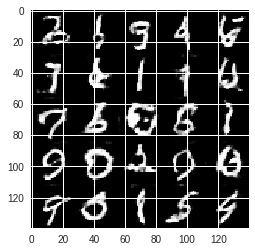

Epoch 2/2... Discriminator Loss: 0.7944... Generator Loss: 1.1875
Epoch 2/2... Discriminator Loss: 0.7109... Generator Loss: 1.2585
Epoch 2/2... Discriminator Loss: 0.4799... Generator Loss: 2.1411
Epoch 2/2... Discriminator Loss: 0.5327... Generator Loss: 1.9221
Epoch 2/2... Discriminator Loss: 0.5816... Generator Loss: 1.6935
Epoch 2/2... Discriminator Loss: 0.5452... Generator Loss: 1.8351
Epoch 2/2... Discriminator Loss: 0.5478... Generator Loss: 1.8890
Epoch 2/2... Discriminator Loss: 0.8160... Generator Loss: 1.2708
Epoch 2/2... Discriminator Loss: 0.7729... Generator Loss: 1.2256
Epoch 2/2... Discriminator Loss: 1.5168... Generator Loss: 0.4459


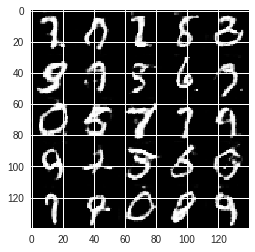

Epoch 2/2... Discriminator Loss: 0.6719... Generator Loss: 1.4395
Epoch 2/2... Discriminator Loss: 0.6601... Generator Loss: 1.4016
Epoch 2/2... Discriminator Loss: 0.6834... Generator Loss: 1.4205
Epoch 2/2... Discriminator Loss: 0.4683... Generator Loss: 2.2218
Epoch 2/2... Discriminator Loss: 0.7720... Generator Loss: 1.2079
Epoch 2/2... Discriminator Loss: 0.8129... Generator Loss: 1.0960
Epoch 2/2... Discriminator Loss: 0.4791... Generator Loss: 2.4861
Epoch 2/2... Discriminator Loss: 1.2019... Generator Loss: 0.7376
Epoch 2/2... Discriminator Loss: 0.6615... Generator Loss: 1.4585
Epoch 2/2... Discriminator Loss: 0.7224... Generator Loss: 1.2972


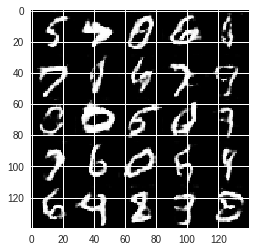

Epoch 2/2... Discriminator Loss: 0.6387... Generator Loss: 1.5400
Epoch 2/2... Discriminator Loss: 0.6599... Generator Loss: 1.4886
Epoch 2/2... Discriminator Loss: 0.6574... Generator Loss: 1.6548
Epoch 2/2... Discriminator Loss: 0.5630... Generator Loss: 1.6979
Epoch 2/2... Discriminator Loss: 0.5669... Generator Loss: 1.7444
Epoch 2/2... Discriminator Loss: 0.5201... Generator Loss: 1.9111
Epoch 2/2... Discriminator Loss: 0.6279... Generator Loss: 1.4958
Epoch 2/2... Discriminator Loss: 0.5954... Generator Loss: 1.7076
Epoch 2/2... Discriminator Loss: 0.8580... Generator Loss: 1.0279
Epoch 2/2... Discriminator Loss: 0.6182... Generator Loss: 1.6440


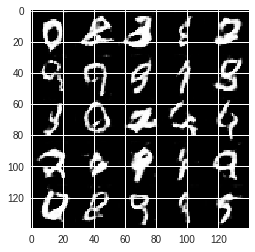

Epoch 2/2... Discriminator Loss: 0.5655... Generator Loss: 1.8358
Epoch 2/2... Discriminator Loss: 0.6143... Generator Loss: 1.7237
Epoch 2/2... Discriminator Loss: 0.6360... Generator Loss: 1.5388
Epoch 2/2... Discriminator Loss: 0.7140... Generator Loss: 1.2474
Epoch 2/2... Discriminator Loss: 0.5927... Generator Loss: 1.8184
Epoch 2/2... Discriminator Loss: 0.6462... Generator Loss: 1.4382
Epoch 2/2... Discriminator Loss: 0.6072... Generator Loss: 1.5399
Epoch 2/2... Discriminator Loss: 0.7230... Generator Loss: 1.2554
Epoch 2/2... Discriminator Loss: 0.5129... Generator Loss: 2.0509
Epoch 2/2... Discriminator Loss: 0.5828... Generator Loss: 1.6971


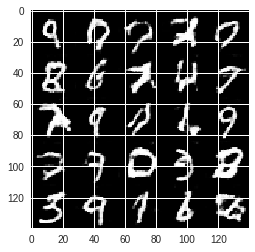

Epoch 2/2... Discriminator Loss: 0.7025... Generator Loss: 1.4199
Epoch 2/2... Discriminator Loss: 0.5035... Generator Loss: 2.0924
Epoch 2/2... Discriminator Loss: 0.9453... Generator Loss: 0.8614
Epoch 2/2... Discriminator Loss: 0.5408... Generator Loss: 1.8859
Epoch 2/2... Discriminator Loss: 0.5294... Generator Loss: 1.8204
Epoch 2/2... Discriminator Loss: 0.4813... Generator Loss: 2.3293
Epoch 2/2... Discriminator Loss: 0.7419... Generator Loss: 1.1696
Epoch 2/2... Discriminator Loss: 0.5648... Generator Loss: 1.6804
Epoch 2/2... Discriminator Loss: 0.6205... Generator Loss: 2.1168
Epoch 2/2... Discriminator Loss: 0.5792... Generator Loss: 2.1812


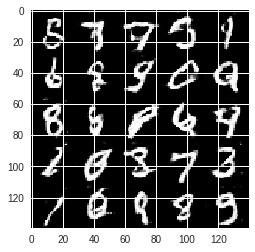

Epoch 2/2... Discriminator Loss: 0.4578... Generator Loss: 2.4140
Epoch 2/2... Discriminator Loss: 0.5678... Generator Loss: 1.7700
Epoch 2/2... Discriminator Loss: 0.4481... Generator Loss: 2.5016
Epoch 2/2... Discriminator Loss: 0.8243... Generator Loss: 1.1248
Epoch 2/2... Discriminator Loss: 1.4345... Generator Loss: 0.5134
Epoch 2/2... Discriminator Loss: 0.4954... Generator Loss: 2.2689
Epoch 2/2... Discriminator Loss: 0.6549... Generator Loss: 1.4960
Epoch 2/2... Discriminator Loss: 0.4109... Generator Loss: 2.7987
Epoch 2/2... Discriminator Loss: 0.5601... Generator Loss: 1.8442
Epoch 2/2... Discriminator Loss: 0.6070... Generator Loss: 1.5731


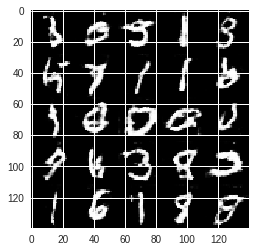

In [33]:
batch_size = 16
z_dim = 100
learning_rate = 0.0001
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 3.6590... Generator Loss: 0.0582
Epoch 1/1... Discriminator Loss: 3.5698... Generator Loss: 0.0653
Epoch 1/1... Discriminator Loss: 1.9234... Generator Loss: 0.2974
Epoch 1/1... Discriminator Loss: 1.1287... Generator Loss: 0.7666
Epoch 1/1... Discriminator Loss: 2.1136... Generator Loss: 0.2379
Epoch 1/1... Discriminator Loss: 1.0421... Generator Loss: 0.8977
Epoch 1/1... Discriminator Loss: 0.8069... Generator Loss: 1.1521
Epoch 1/1... Discriminator Loss: 1.3777... Generator Loss: 0.6523
Epoch 1/1... Discriminator Loss: 2.2590... Generator Loss: 0.1790
Epoch 1/1... Discriminator Loss: 1.9461... Generator Loss: 0.2603


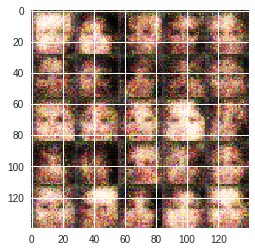

Epoch 1/1... Discriminator Loss: 1.5390... Generator Loss: 0.3774
Epoch 1/1... Discriminator Loss: 1.2289... Generator Loss: 0.9050
Epoch 1/1... Discriminator Loss: 1.8765... Generator Loss: 0.3211
Epoch 1/1... Discriminator Loss: 2.0863... Generator Loss: 0.2261
Epoch 1/1... Discriminator Loss: 1.5374... Generator Loss: 0.4465
Epoch 1/1... Discriminator Loss: 1.1471... Generator Loss: 0.9208
Epoch 1/1... Discriminator Loss: 1.6029... Generator Loss: 0.4014
Epoch 1/1... Discriminator Loss: 1.4003... Generator Loss: 1.2784
Epoch 1/1... Discriminator Loss: 1.5706... Generator Loss: 0.3882
Epoch 1/1... Discriminator Loss: 1.5742... Generator Loss: 0.3994


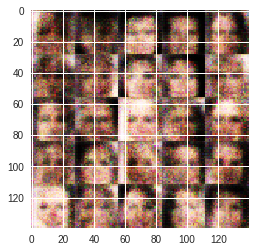

Epoch 1/1... Discriminator Loss: 1.1131... Generator Loss: 0.7682
Epoch 1/1... Discriminator Loss: 1.3588... Generator Loss: 0.8435
Epoch 1/1... Discriminator Loss: 1.0094... Generator Loss: 1.2178
Epoch 1/1... Discriminator Loss: 1.5259... Generator Loss: 0.4194
Epoch 1/1... Discriminator Loss: 1.3418... Generator Loss: 0.5808
Epoch 1/1... Discriminator Loss: 1.1370... Generator Loss: 1.2249
Epoch 1/1... Discriminator Loss: 1.2748... Generator Loss: 1.0361
Epoch 1/1... Discriminator Loss: 1.6758... Generator Loss: 0.3668
Epoch 1/1... Discriminator Loss: 1.7089... Generator Loss: 1.5274
Epoch 1/1... Discriminator Loss: 1.1700... Generator Loss: 1.0852


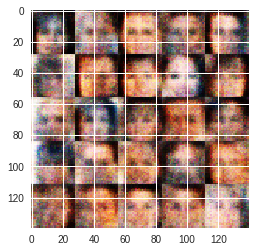

Epoch 1/1... Discriminator Loss: 1.4349... Generator Loss: 0.6239
Epoch 1/1... Discriminator Loss: 1.1479... Generator Loss: 0.7742
Epoch 1/1... Discriminator Loss: 1.6351... Generator Loss: 0.3679
Epoch 1/1... Discriminator Loss: 0.8581... Generator Loss: 1.2115
Epoch 1/1... Discriminator Loss: 1.7124... Generator Loss: 0.3551
Epoch 1/1... Discriminator Loss: 0.9511... Generator Loss: 1.5202
Epoch 1/1... Discriminator Loss: 1.8183... Generator Loss: 0.2837
Epoch 1/1... Discriminator Loss: 1.5225... Generator Loss: 0.4086
Epoch 1/1... Discriminator Loss: 1.0989... Generator Loss: 1.9345
Epoch 1/1... Discriminator Loss: 1.4269... Generator Loss: 0.4717


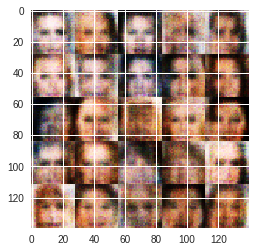

Epoch 1/1... Discriminator Loss: 0.7796... Generator Loss: 1.1895
Epoch 1/1... Discriminator Loss: 0.8355... Generator Loss: 1.1932
Epoch 1/1... Discriminator Loss: 1.0090... Generator Loss: 1.7298
Epoch 1/1... Discriminator Loss: 1.8262... Generator Loss: 0.3121
Epoch 1/1... Discriminator Loss: 0.8684... Generator Loss: 1.0126
Epoch 1/1... Discriminator Loss: 1.3766... Generator Loss: 0.4857
Epoch 1/1... Discriminator Loss: 1.1562... Generator Loss: 0.6170
Epoch 1/1... Discriminator Loss: 0.8239... Generator Loss: 1.1470
Epoch 1/1... Discriminator Loss: 0.8262... Generator Loss: 1.8170
Epoch 1/1... Discriminator Loss: 0.6410... Generator Loss: 1.5721


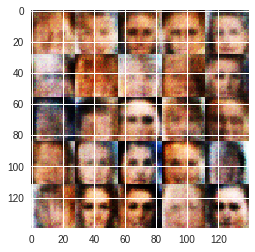

Epoch 1/1... Discriminator Loss: 2.3646... Generator Loss: 0.1623
Epoch 1/1... Discriminator Loss: 1.7999... Generator Loss: 0.2987
Epoch 1/1... Discriminator Loss: 0.7294... Generator Loss: 1.3272
Epoch 1/1... Discriminator Loss: 1.2974... Generator Loss: 0.6003
Epoch 1/1... Discriminator Loss: 1.0452... Generator Loss: 0.8065
Epoch 1/1... Discriminator Loss: 1.2769... Generator Loss: 0.7372
Epoch 1/1... Discriminator Loss: 1.3621... Generator Loss: 0.5512
Epoch 1/1... Discriminator Loss: 1.2905... Generator Loss: 0.6139
Epoch 1/1... Discriminator Loss: 1.1665... Generator Loss: 0.7365
Epoch 1/1... Discriminator Loss: 1.8213... Generator Loss: 0.4119


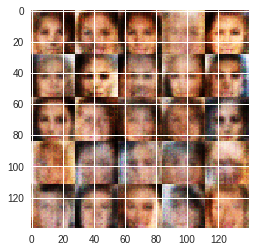

Epoch 1/1... Discriminator Loss: 1.3791... Generator Loss: 0.4783
Epoch 1/1... Discriminator Loss: 1.9017... Generator Loss: 0.2613
Epoch 1/1... Discriminator Loss: 0.5658... Generator Loss: 1.9509
Epoch 1/1... Discriminator Loss: 1.3308... Generator Loss: 0.6747
Epoch 1/1... Discriminator Loss: 1.1084... Generator Loss: 1.1539
Epoch 1/1... Discriminator Loss: 1.2735... Generator Loss: 0.9504
Epoch 1/1... Discriminator Loss: 1.1090... Generator Loss: 0.9328
Epoch 1/1... Discriminator Loss: 0.8944... Generator Loss: 1.1252
Epoch 1/1... Discriminator Loss: 0.5906... Generator Loss: 1.8002
Epoch 1/1... Discriminator Loss: 1.0983... Generator Loss: 0.7040


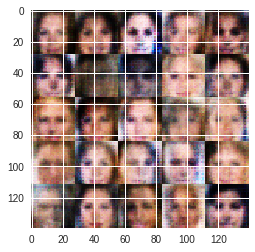

Epoch 1/1... Discriminator Loss: 1.9256... Generator Loss: 0.2830
Epoch 1/1... Discriminator Loss: 1.1311... Generator Loss: 1.6437
Epoch 1/1... Discriminator Loss: 1.3832... Generator Loss: 0.6199
Epoch 1/1... Discriminator Loss: 0.8386... Generator Loss: 1.7823
Epoch 1/1... Discriminator Loss: 0.8177... Generator Loss: 1.2023
Epoch 1/1... Discriminator Loss: 0.9893... Generator Loss: 0.8999
Epoch 1/1... Discriminator Loss: 0.9797... Generator Loss: 0.9416
Epoch 1/1... Discriminator Loss: 0.8577... Generator Loss: 1.1921
Epoch 1/1... Discriminator Loss: 0.8355... Generator Loss: 1.2258
Epoch 1/1... Discriminator Loss: 0.5156... Generator Loss: 3.1380


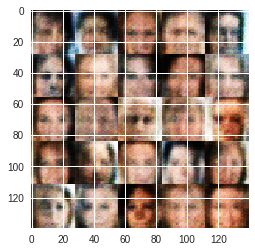

Epoch 1/1... Discriminator Loss: 1.0466... Generator Loss: 1.6491
Epoch 1/1... Discriminator Loss: 1.6765... Generator Loss: 0.3476
Epoch 1/1... Discriminator Loss: 1.9383... Generator Loss: 0.2849
Epoch 1/1... Discriminator Loss: 3.1211... Generator Loss: 0.0708
Epoch 1/1... Discriminator Loss: 1.1902... Generator Loss: 0.6301
Epoch 1/1... Discriminator Loss: 2.2621... Generator Loss: 0.1823
Epoch 1/1... Discriminator Loss: 0.8548... Generator Loss: 1.0991
Epoch 1/1... Discriminator Loss: 0.6848... Generator Loss: 1.6976
Epoch 1/1... Discriminator Loss: 2.0944... Generator Loss: 0.2183
Epoch 1/1... Discriminator Loss: 0.7955... Generator Loss: 1.2679


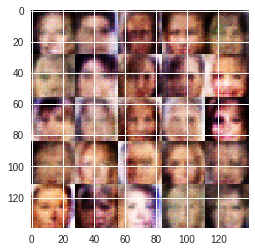

Epoch 1/1... Discriminator Loss: 0.7560... Generator Loss: 1.3293
Epoch 1/1... Discriminator Loss: 0.9820... Generator Loss: 0.8528
Epoch 1/1... Discriminator Loss: 1.3869... Generator Loss: 0.4714
Epoch 1/1... Discriminator Loss: 2.1997... Generator Loss: 3.1525
Epoch 1/1... Discriminator Loss: 2.0377... Generator Loss: 0.2252
Epoch 1/1... Discriminator Loss: 1.5320... Generator Loss: 0.9611
Epoch 1/1... Discriminator Loss: 0.7424... Generator Loss: 1.3809
Epoch 1/1... Discriminator Loss: 0.8698... Generator Loss: 1.5120
Epoch 1/1... Discriminator Loss: 1.3572... Generator Loss: 0.5365
Epoch 1/1... Discriminator Loss: 0.9577... Generator Loss: 2.5476


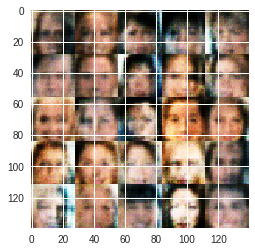

Epoch 1/1... Discriminator Loss: 0.6600... Generator Loss: 1.5484
Epoch 1/1... Discriminator Loss: 2.5239... Generator Loss: 0.1315
Epoch 1/1... Discriminator Loss: 1.9083... Generator Loss: 0.2628
Epoch 1/1... Discriminator Loss: 0.9998... Generator Loss: 0.8500
Epoch 1/1... Discriminator Loss: 1.1957... Generator Loss: 1.0790
Epoch 1/1... Discriminator Loss: 0.6051... Generator Loss: 2.5318
Epoch 1/1... Discriminator Loss: 2.0945... Generator Loss: 0.2326
Epoch 1/1... Discriminator Loss: 0.9411... Generator Loss: 1.4734
Epoch 1/1... Discriminator Loss: 1.2060... Generator Loss: 0.6915
Epoch 1/1... Discriminator Loss: 0.6361... Generator Loss: 1.6314


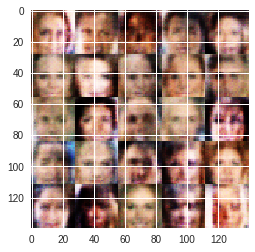

Epoch 1/1... Discriminator Loss: 0.5971... Generator Loss: 3.2338
Epoch 1/1... Discriminator Loss: 0.5774... Generator Loss: 1.9940
Epoch 1/1... Discriminator Loss: 0.8264... Generator Loss: 1.4700
Epoch 1/1... Discriminator Loss: 1.5907... Generator Loss: 0.3763
Epoch 1/1... Discriminator Loss: 0.8220... Generator Loss: 1.8925
Epoch 1/1... Discriminator Loss: 0.7185... Generator Loss: 4.5759
Epoch 1/1... Discriminator Loss: 1.1169... Generator Loss: 1.1102
Epoch 1/1... Discriminator Loss: 0.5071... Generator Loss: 2.6175
Epoch 1/1... Discriminator Loss: 0.7186... Generator Loss: 1.3653
Epoch 1/1... Discriminator Loss: 0.8821... Generator Loss: 1.0448


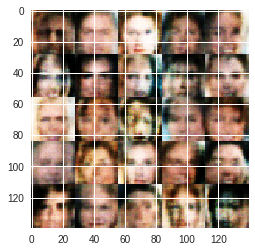

Epoch 1/1... Discriminator Loss: 0.4723... Generator Loss: 3.8788
Epoch 1/1... Discriminator Loss: 0.7470... Generator Loss: 1.2156
Epoch 1/1... Discriminator Loss: 1.6430... Generator Loss: 5.1256
Epoch 1/1... Discriminator Loss: 1.3537... Generator Loss: 0.5110
Epoch 1/1... Discriminator Loss: 1.2743... Generator Loss: 0.8331
Epoch 1/1... Discriminator Loss: 0.5102... Generator Loss: 2.6244
Epoch 1/1... Discriminator Loss: 1.2053... Generator Loss: 3.6204
Epoch 1/1... Discriminator Loss: 0.8302... Generator Loss: 1.5671
Epoch 1/1... Discriminator Loss: 0.5017... Generator Loss: 2.0759
Epoch 1/1... Discriminator Loss: 1.5785... Generator Loss: 0.3829


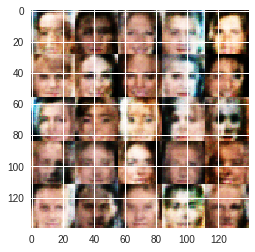

Epoch 1/1... Discriminator Loss: 0.5925... Generator Loss: 3.5162
Epoch 1/1... Discriminator Loss: 0.5873... Generator Loss: 1.6588
Epoch 1/1... Discriminator Loss: 0.7605... Generator Loss: 1.2147
Epoch 1/1... Discriminator Loss: 1.4191... Generator Loss: 0.5337
Epoch 1/1... Discriminator Loss: 1.0041... Generator Loss: 0.8812
Epoch 1/1... Discriminator Loss: 1.3943... Generator Loss: 0.5232
Epoch 1/1... Discriminator Loss: 1.1761... Generator Loss: 0.6716
Epoch 1/1... Discriminator Loss: 0.4630... Generator Loss: 2.5308
Epoch 1/1... Discriminator Loss: 0.4696... Generator Loss: 4.7680
Epoch 1/1... Discriminator Loss: 1.0298... Generator Loss: 0.8312


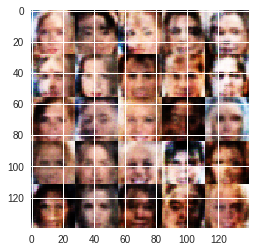

Epoch 1/1... Discriminator Loss: 0.6616... Generator Loss: 3.0527
Epoch 1/1... Discriminator Loss: 0.5032... Generator Loss: 2.3919
Epoch 1/1... Discriminator Loss: 0.5592... Generator Loss: 1.7848
Epoch 1/1... Discriminator Loss: 1.2937... Generator Loss: 1.5385
Epoch 1/1... Discriminator Loss: 2.1020... Generator Loss: 0.2258
Epoch 1/1... Discriminator Loss: 1.1502... Generator Loss: 0.8224
Epoch 1/1... Discriminator Loss: 0.9679... Generator Loss: 1.1744
Epoch 1/1... Discriminator Loss: 1.6454... Generator Loss: 0.3900
Epoch 1/1... Discriminator Loss: 0.7502... Generator Loss: 2.2337
Epoch 1/1... Discriminator Loss: 0.7065... Generator Loss: 1.3505


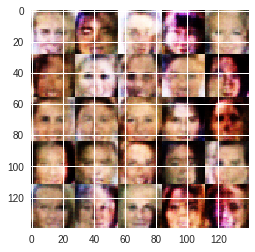

Epoch 1/1... Discriminator Loss: 1.1362... Generator Loss: 0.7206
Epoch 1/1... Discriminator Loss: 0.4165... Generator Loss: 3.0166
Epoch 1/1... Discriminator Loss: 2.5387... Generator Loss: 0.1424
Epoch 1/1... Discriminator Loss: 0.8058... Generator Loss: 2.4014
Epoch 1/1... Discriminator Loss: 0.5281... Generator Loss: 5.1470
Epoch 1/1... Discriminator Loss: 0.4966... Generator Loss: 2.1631
Epoch 1/1... Discriminator Loss: 0.5606... Generator Loss: 5.6277
Epoch 1/1... Discriminator Loss: 0.5517... Generator Loss: 2.1961
Epoch 1/1... Discriminator Loss: 0.4754... Generator Loss: 2.8592
Epoch 1/1... Discriminator Loss: 0.4117... Generator Loss: 3.3066


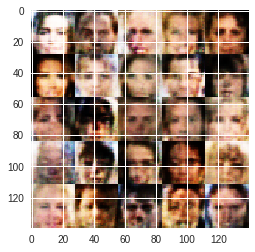

Epoch 1/1... Discriminator Loss: 0.3700... Generator Loss: 4.4944
Epoch 1/1... Discriminator Loss: 0.5219... Generator Loss: 2.5422
Epoch 1/1... Discriminator Loss: 0.3681... Generator Loss: 3.6819
Epoch 1/1... Discriminator Loss: 0.4064... Generator Loss: 3.9811
Epoch 1/1... Discriminator Loss: 0.3972... Generator Loss: 3.8514
Epoch 1/1... Discriminator Loss: 0.8487... Generator Loss: 4.5987
Epoch 1/1... Discriminator Loss: 0.5052... Generator Loss: 2.9123
Epoch 1/1... Discriminator Loss: 0.4693... Generator Loss: 2.3233
Epoch 1/1... Discriminator Loss: 1.0319... Generator Loss: 0.8403
Epoch 1/1... Discriminator Loss: 0.3414... Generator Loss: 5.2626


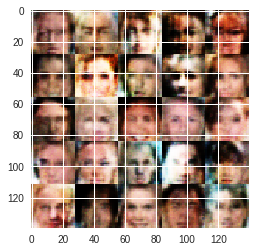

Epoch 1/1... Discriminator Loss: 0.7534... Generator Loss: 3.5800
Epoch 1/1... Discriminator Loss: 0.3565... Generator Loss: 5.2073
Epoch 1/1... Discriminator Loss: 0.3497... Generator Loss: 6.1152
Epoch 1/1... Discriminator Loss: 0.4006... Generator Loss: 2.9681
Epoch 1/1... Discriminator Loss: 0.3678... Generator Loss: 4.0270
Epoch 1/1... Discriminator Loss: 0.5511... Generator Loss: 1.7958
Epoch 1/1... Discriminator Loss: 0.4808... Generator Loss: 3.3341
Epoch 1/1... Discriminator Loss: 0.8881... Generator Loss: 1.0692
Epoch 1/1... Discriminator Loss: 0.6458... Generator Loss: 1.4736
Epoch 1/1... Discriminator Loss: 0.3737... Generator Loss: 5.1213


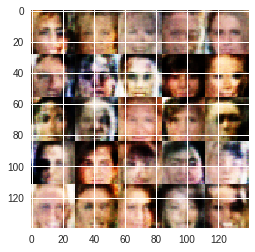

Epoch 1/1... Discriminator Loss: 0.3667... Generator Loss: 5.0623
Epoch 1/1... Discriminator Loss: 0.3883... Generator Loss: 3.8826
Epoch 1/1... Discriminator Loss: 0.4169... Generator Loss: 4.5047
Epoch 1/1... Discriminator Loss: 1.0374... Generator Loss: 0.7994
Epoch 1/1... Discriminator Loss: 0.4298... Generator Loss: 7.1489
Epoch 1/1... Discriminator Loss: 0.5737... Generator Loss: 1.6935
Epoch 1/1... Discriminator Loss: 0.3852... Generator Loss: 3.3940
Epoch 1/1... Discriminator Loss: 0.3397... Generator Loss: 5.7337
Epoch 1/1... Discriminator Loss: 0.4384... Generator Loss: 2.5142
Epoch 1/1... Discriminator Loss: 0.5657... Generator Loss: 4.6895


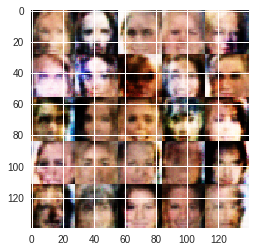

Epoch 1/1... Discriminator Loss: 0.3586... Generator Loss: 6.5927
Epoch 1/1... Discriminator Loss: 0.3807... Generator Loss: 3.5726
Epoch 1/1... Discriminator Loss: 0.3399... Generator Loss: 5.7918
Epoch 1/1... Discriminator Loss: 0.3510... Generator Loss: 4.3225
Epoch 1/1... Discriminator Loss: 0.3601... Generator Loss: 4.1898
Epoch 1/1... Discriminator Loss: 0.3453... Generator Loss: 8.4455
Epoch 1/1... Discriminator Loss: 0.3802... Generator Loss: 3.3602
Epoch 1/1... Discriminator Loss: 0.4649... Generator Loss: 2.6664
Epoch 1/1... Discriminator Loss: 0.3436... Generator Loss: 6.3690
Epoch 1/1... Discriminator Loss: 0.3484... Generator Loss: 7.5647


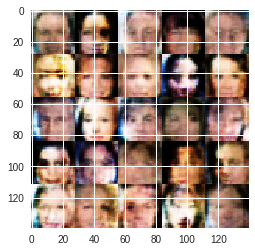

Epoch 1/1... Discriminator Loss: 0.3315... Generator Loss: 8.2197
Epoch 1/1... Discriminator Loss: 0.4993... Generator Loss: 6.3193
Epoch 1/1... Discriminator Loss: 0.3411... Generator Loss: 5.3408
Epoch 1/1... Discriminator Loss: 0.3356... Generator Loss: 5.9474
Epoch 1/1... Discriminator Loss: 0.5943... Generator Loss: 1.7079
Epoch 1/1... Discriminator Loss: 0.3487... Generator Loss: 4.3412
Epoch 1/1... Discriminator Loss: 1.0596... Generator Loss: 0.7835
Epoch 1/1... Discriminator Loss: 0.5671... Generator Loss: 2.1544
Epoch 1/1... Discriminator Loss: 0.3882... Generator Loss: 3.4019
Epoch 1/1... Discriminator Loss: 0.3572... Generator Loss: 8.0174


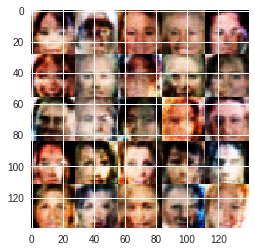

Epoch 1/1... Discriminator Loss: 0.6622... Generator Loss: 7.3478
Epoch 1/1... Discriminator Loss: 0.5508... Generator Loss: 1.8393
Epoch 1/1... Discriminator Loss: 0.3398... Generator Loss: 6.0440
Epoch 1/1... Discriminator Loss: 0.5284... Generator Loss: 1.8782
Epoch 1/1... Discriminator Loss: 0.3552... Generator Loss: 5.4008
Epoch 1/1... Discriminator Loss: 0.3524... Generator Loss: 7.0945
Epoch 1/1... Discriminator Loss: 0.3718... Generator Loss: 4.0573
Epoch 1/1... Discriminator Loss: 0.8752... Generator Loss: 1.0671
Epoch 1/1... Discriminator Loss: 0.3401... Generator Loss: 7.0961
Epoch 1/1... Discriminator Loss: 0.3539... Generator Loss: 4.9103


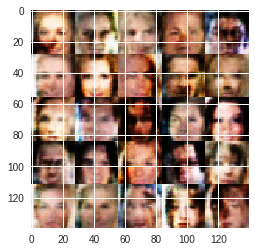

Epoch 1/1... Discriminator Loss: 0.7377... Generator Loss: 7.2294
Epoch 1/1... Discriminator Loss: 1.6439... Generator Loss: 0.3891
Epoch 1/1... Discriminator Loss: 0.3336... Generator Loss: 6.4669
Epoch 1/1... Discriminator Loss: 0.3620... Generator Loss: 5.5711
Epoch 1/1... Discriminator Loss: 0.4292... Generator Loss: 2.6823
Epoch 1/1... Discriminator Loss: 0.3356... Generator Loss: 5.7188
Epoch 1/1... Discriminator Loss: 0.3451... Generator Loss: 5.1058
Epoch 1/1... Discriminator Loss: 0.3404... Generator Loss: 7.7861
Epoch 1/1... Discriminator Loss: 0.4039... Generator Loss: 2.9076
Epoch 1/1... Discriminator Loss: 0.6425... Generator Loss: 6.3165


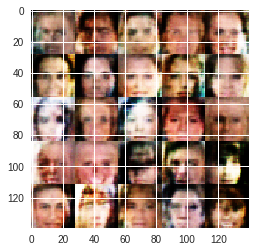

Epoch 1/1... Discriminator Loss: 0.3399... Generator Loss: 7.9883
Epoch 1/1... Discriminator Loss: 0.3466... Generator Loss: 4.6099
Epoch 1/1... Discriminator Loss: 0.3915... Generator Loss: 3.0282
Epoch 1/1... Discriminator Loss: 0.3360... Generator Loss: 6.0379
Epoch 1/1... Discriminator Loss: 0.6650... Generator Loss: 5.3445
Epoch 1/1... Discriminator Loss: 0.3489... Generator Loss: 4.5668
Epoch 1/1... Discriminator Loss: 0.3483... Generator Loss: 4.7869
Epoch 1/1... Discriminator Loss: 0.3408... Generator Loss: 6.1689
Epoch 1/1... Discriminator Loss: 1.8751... Generator Loss: 0.2767
Epoch 1/1... Discriminator Loss: 0.3407... Generator Loss: 5.2759


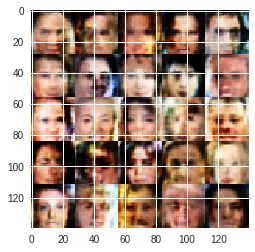

Epoch 1/1... Discriminator Loss: 0.6316... Generator Loss: 1.4673
Epoch 1/1... Discriminator Loss: 0.3940... Generator Loss: 5.5781
Epoch 1/1... Discriminator Loss: 0.4339... Generator Loss: 2.9949
Epoch 1/1... Discriminator Loss: 0.3399... Generator Loss: 6.9140
Epoch 1/1... Discriminator Loss: 0.3388... Generator Loss: 5.7365
Epoch 1/1... Discriminator Loss: 0.3801... Generator Loss: 5.6302
Epoch 1/1... Discriminator Loss: 2.5726... Generator Loss: 10.8165
Epoch 1/1... Discriminator Loss: 0.8060... Generator Loss: 1.0554
Epoch 1/1... Discriminator Loss: 0.5049... Generator Loss: 2.1624
Epoch 1/1... Discriminator Loss: 1.4493... Generator Loss: 0.4998


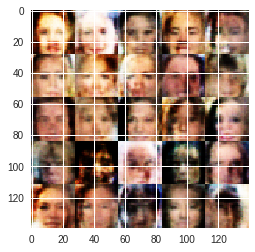

Epoch 1/1... Discriminator Loss: 0.3466... Generator Loss: 6.5608
Epoch 1/1... Discriminator Loss: 0.3639... Generator Loss: 4.1363
Epoch 1/1... Discriminator Loss: 0.3387... Generator Loss: 8.3494
Epoch 1/1... Discriminator Loss: 0.3358... Generator Loss: 5.8274
Epoch 1/1... Discriminator Loss: 0.3501... Generator Loss: 8.0407
Epoch 1/1... Discriminator Loss: 0.3375... Generator Loss: 5.3089
Epoch 1/1... Discriminator Loss: 0.3440... Generator Loss: 6.7684
Epoch 1/1... Discriminator Loss: 0.7261... Generator Loss: 7.8340
Epoch 1/1... Discriminator Loss: 0.3436... Generator Loss: 4.8208
Epoch 1/1... Discriminator Loss: 0.3582... Generator Loss: 5.5856


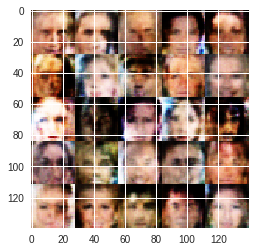

In [0]:
batch_size = 16
z_dim = 100
learning_rate =  0.0001
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.